In [1]:
#on command prompt - python.exe -m pip install --upgrade pip

In [2]:
#pip install pandas
#pip install numpy
#!pip install scikit-learn

In [3]:
#!pip install regex
#!pip install openpyxl
#!pip install missingno

In [4]:
#pip install --upgrade statsmodels

# Importing Libraries

In [5]:
import os
import numpy as np
import pandas as pd
import ast
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

import regex as re

# Reading the data

In [6]:
PROJECT_DIR = r"C:\Users\ABC\Desktop\bhushan\magicbricks.com\mg_project\data"

In [7]:
def get_data(name,col_range):
    file_name = f"{name}.csv"
    file_path = os.path.join(PROJECT_DIR, file_name)
    return pd.read_csv(file_path,usecols=col_range,low_memory=False)

In [8]:
mg_first100 = get_data("f_original magicbricks cleaned 12022 data",col_range = range(100))
mg_nxt100 = get_data("f_original magicbricks cleaned 12022 data",col_range=range(100,200))
mg_last90 = get_data("f_original magicbricks cleaned 12022 data",col_range=range(200,290))

In [9]:
print(mg_first100.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12022 entries, 0 to 12021
Data columns (total 100 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       12022 non-null  object 
 1   @type                    12022 non-null  object 
 2   @id                      12022 non-null  object 
 3   url                      12022 non-null  object 
 4   numberOfRooms            11913 non-null  float64
 5   image                    11092 non-null  object 
 6   name                     12022 non-null  object 
 7   geo                      11546 non-null  object 
 8   potentialAction          12022 non-null  object 
 9   address                  12022 non-null  object 
 10  PRICE                    12021 non-null  object 
 11  BHK_Type                 11912 non-null  object 
 12  Area                     9479 non-null   object 
 13  property_loc             11970 non-null  object 
 14  locality_URL         

In [10]:
print(mg_nxt100.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12022 entries, 0 to 12021
Data columns (total 100 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   liv_Places of Interest              10714 non-null  object 
 1   BB_beds                             3503 non-null   float64
 2   BB_baths                            5019 non-null   float64
 3   BB_covered-parking                  1994 non-null   float64
 4   BB_unfurnished                      0 non-null      float64
 5   many_Carpet Area                    5404 non-null   object 
 6   many_Developer                      3832 non-null   object 
 7   many_Project                        4287 non-null   object 
 8   many_Transaction type               6742 non-null   object 
 9   many_Status                         4630 non-null   object 
 10  many_Lifts                          2624 non-null   float64
 11  many_Furnished Status               6502

In [11]:
print(mg_last90.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12022 entries, 0 to 12021
Data columns (total 90 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   4 BHK Flat                    856 non-null    object 
 1   AP_Tower                      339 non-null    object 
 2   leftmany_Carpet Area          4749 non-null   object 
 3   Tourist Spot_2                1051 non-null   object 
 4   AM_12511                      155 non-null    object 
 5   MD_Age of Construction        10327 non-null  object 
 6   BB_balcony                    1443 non-null   float64
 7   many_Age of Construction      2615 non-null   object 
 8   leftBB_balcony                1644 non-null   float64
 9   leftmany_Age of Construction  1326 non-null   object 
 10  AM_12579                      100 non-null    object 
 11  BB_balconies                  1653 non-null   float64
 12  leftBB_balconies              1364 non-null   float64
 13  A

In [12]:
mg = get_data("f_original magicbricks cleaned 12022 data",col_range=range(290))

In [13]:
#create a copy of original dataframe
df=mg.copy()

In [14]:
df.shape

(12022, 290)

In [15]:
#make all values and column name in lowercase
df.columns = df.columns.str.lower()  # Convert column names to lowercase
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)  # Convert string values to lowercase

C:\Users\ABC\AppData\Local\Temp\ipykernel_1308\2870125810.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)  # Convert string values to lowercase


In [16]:
#check duplicate rows
print("Number of duplicate rows:", np.sum(df.duplicated()))

Number of duplicate rows: 0


In [17]:
#delete column which have all nan values
df=df.dropna(how='all',axis=1)

In [18]:
df.shape

(12022, 282)

In [19]:
df.isnull().sum()

id                     0
@type                  0
@id                    0
url                    0
numberofrooms        109
                   ...  
am_12513           12019
am_12550           12019
am_12552           12019
am_12553           12019
3 bhk penthouse    12019
Length: 282, dtype: int64

`observation`

- Dataset contains 12022 rows and 282 features.  
- 282 columns, so it needs to be shortened.  
- Data types of some features are not appropriate.  
- Features have missing values.

-  compare and keep only one from this -> bb_baths,leftbb_baths,bb_bath,leftbb_bath
-  comapre and keep only one from this -> 'bb_covered-parking','leftbb_covered-parking','many_car parking','leftmany_car parking'
-  compare and keep only one from this -> 'many_developer','leftmany_developer','ap_buildr'
-  compare and keep only one from this -> ap_pjt_name,many_project,leftmany_project
-  compare and keep only one from this -> 'md_furnishing','bb_unfurnished','many_furnished status','leftbb_unfurnished','leftmany_furnished status','bb_semi-furnished','leftbb_semi-furnished','bb_furnished','leftbb_furnished'
-  work on 'price' column 
-  compare and keep only one from this -> 'many_carpet area','leftmany_carpet area'
-  compare and keep only one from this -> 'leftmany_super built-up area','many_super built-up area'
-  compare and keep only one from this(property_type) -> 'many_transaction type','leftmany_transaction type'
-  compare and keep only one from this -> 'md_type of ownership', 'many_type of ownership' ,'leftmany_type of ownership'
-  compare and keep only one from this -> 'many_status', 'leftmany_status'
-  compare and keep only one from this -> 'many_lifts','md_lift','leftmany_lifts','many_lift','leftmany_lift'
-  compare and keep only one from this -> 'aboutpjt_total floors', 'md_floors allowed for construction','many_floor', 'leftmany_floor'
-  compare and keep only one from this -> 'md_age of construction', 'many_age of construction', 'leftmany_age of construction'
-  compare and keep only one from this -> 'bb_balcony', 'leftbb_balcony', 'bb_balconies','leftbb_balconies'
-  compare and keep only one from this -> 'md_additional rooms', 'leftmany_additional rooms', 'many_additional rooms'
-  compare and keep only one from this -> 'leftmany_facing', 'many_facing'
-  compare and make separate column for tower and unit -> 'ap_tower & unit','aboutpjt_total units','aboutpjt_total towers','ap_tower','ap_unit'
-  compare and keep only one from this -> 'numberofrooms','bb_beds','leftbb_beds','bb_bed','leftbb_bed'

`observation`

- geo - longitude and latitude  
- potentialAction - seller:[organization,person,realestateagent] , make 3 columns like this
-  some properties are from navimumbai written in 'address' column and even then also in 'property_loc' column they written mumbai so find that and change that in  'property_loc' column and then delete "address" column
-  combine all 'am' columns together in list
- combine 'educational institute' - 'educational institute_1','educational institute_2','educational institute_3','educational institute_4','educational institute_5'
- combine 'transportation hub' - 'transportation hub_1','transportation hub_2','transportation hub_3','transportation hub_4','transportation hub_5'
- combine 'shopping centre' - 'shopping centre_1','shopping centre_2','shopping centre_3','shopping centre_4','shopping centre_5'
- combine 'commercial hub_1','commercial hub_2','commercial hub_3','commercial hub_4','commercial hub_5'
- combine 'hospital_1','hospital_2','hospital_3','hospital_4','hospital_5'
- combine 'tourist spot_1','tourist spot_2','tourist spot_3','tourist spot_4'
- work on md_overlooking
- make categories like flat and apartment from 'name' column
- emi column :convert all values in lakh
- aboutpjt_project size : convert all in sqft

drop this columns :  
'@id','@type','bhk_type' ,'locality_url','md_booking amount','md_loan offered','md_water availability','ap_price','ap_price per sqft','ap_configuration','ap_pjt_url','ap_ratings','ap_reviews_by','headings_with_ratings','aboutpjt_bhk','2 bhk flat','locality_url_review','liv_environment','liv_commuting','liv_places of interest','md_status of electricity','3 bhk flat','1 bhk flat','studio apartment','4 bhk flat','5 bhk flat','md_landmarks', 'multistorey apartment', '3 bhk villa', '4 bhk villa', 'residential plot', '2 bhk builder', '3 bhk builder','4 bhk penthouse','5 bhk penthouse', 'md_authority approval','6 bhk flat','rent','commercial office space','3 bhk penthouse','md_rera id','aboutpjt_launch date'

feature engineering
- md_flooring - give weightage to each and sum it, eg:[marble,ceramic] = [1,2] = 3

# Data Cleaning

## Bath

`observation`
 - columns :'bb_baths','leftbb_baths','bb_bath','leftbb_bath'
 - combine all in newly created column
 - and then keep only one bath value
 - make dtype as float 

In [20]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_colwidth',None)

In [21]:
df[['bb_baths','leftbb_baths','bb_bath','leftbb_bath']].head(2)

,bb_baths,leftbb_baths,bb_bath,leftbb_bath
0,2.0,NaN,NaN,NaN
1,NaN,3.0,NaN,NaN


In [22]:
#'bb_baths','leftbb_baths','bb_bath','leftbb_bath'
#join all this columns in one column 

df['bath'] = df['bb_baths'].astype(str) + "," + df['leftbb_baths'].astype(str) + "," + df['bb_bath'].astype(str) + "," + df['leftbb_bath'].astype(str)

In [23]:
df.head(2)

,id,@type,@id,url,numberofrooms,image,name,geo,potentialaction,address,...,am_1404159,am_12516,am_12580,commercial office space,am_12513,am_12550,am_12552,am_12553,3 bhk penthouse,bath
0,cardid69429251,apartment,https://www.magicbricks.com/propertydetails/2-bhk-635-sq-ft-multistorey-apartment-for-sale-pokhran-road-in-thane&id=4d423639343239323531,https://www.magicbricks.com/propertydetails/2-bhk-635-sq-ft-multistorey-apartment-for-sale-pokhran-road-in-thane&id=4d423639343239323531,2.0,https://img.staticmb.com/mbimages/project/photo_h310_w462/2023/04/14/project-photo-6-raymond-realty-ten-x-habitat-thane-5124557_1200_1600_310_462.jpg,"2 bhk flat for sale in tenx habitat raymond realty, pokhran road, thane","{'@type': 'geocoordinates', 'latitude': '19.20777713', 'longitude': '72.96747907'}","{'@type': 'buyaction', 'seller': {'@type': 'organization', 'name': 'raymond realty'}}","{'@type': 'postaladdress', 'addresslocality': 'pokhran road', 'addressregion': 'thane', 'addresscountry': 'in'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2.0,nan,nan,nan"
1,cardid69427147,apartment,https://www.magicbricks.com/propertydetails/3-bhk-1905-sq-ft-multistorey-apartment-for-sale-kharghar-in-navi-mumbai&id=4d423639343237313437,https://www.magicbricks.com/propertydetails/3-bhk-1905-sq-ft-multistorey-apartment-for-sale-kharghar-in-navi-mumbai&id=4d423639343237313437,3.0,https://img.staticmb.com/mbimages/project/photo_h310_w462/project-photo-28-sai-world-empire-navi-mumbai-5088768_600_800_310_462.jpg,"3 bhk flat for sale in paradise sai world empire, kharghar, navi mumbai","{'@type': 'geocoordinates', 'latitude': '19.08060457', 'longitude': '73.07393855'}","{'@type': 'buyaction', 'seller': {'@type': 'realestateagent', 'name': 'aristo real estate consultants'}}","{'@type': 'postaladdress', 'addresslocality': 'kharghar', 'addressregion': 'navi mumbai', 'addresscountry': 'in'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"nan,3.0,nan,nan"


In [24]:
#from this : 2.0,nan,nan,nan to this: 2.0 
#and if all values like this nan,nan,nan,nan then keep one nan 
df['bath'] = df['bath'].apply(
    lambda x: None if all(item.strip() == 'nan' for item in x.split(',')) else re.sub(r'(,?nan)+', '', x).strip(',')
)

In [25]:
#chk if any row have more than one value or not
#eg: values will be like this: 2.0,3.0 ,  so to detect this I use  ',' here to detect such rows 
df['bath'].str.contains(',', na=False).sum()

0

In [26]:
df['bath'].value_counts()

bath
2.0     6577
3.0     2487
1.0     1740
4.0      781
5.0      279
6.0       88
7.0       11
10.0       7
8.0        7
9.0        1
Name: count, dtype: int64

In [27]:
df['bath'].dtype

dtype('O')

In [28]:
df['bath'] = pd.to_numeric(df['bath'], errors='coerce')

In [29]:
df['bath'].dtype

dtype('float64')

In [30]:
#nan values in bath column 
df['bath'].isna().sum()

44

In [31]:
# Drop columns : 'bb_baths','leftbb_baths','bb_bath','leftbb_bath'
df = df.drop(['bb_baths','leftbb_baths','bb_bath','leftbb_bath'],axis=1)

## Parking

comapre and keep only one from this -> 'bb_covered-parking','leftbb_covered-parking','many_car parking','leftmany_car parking'

`observation`
  - 4 columns :'bb_covered-parking','leftbb_covered-parking','many_car parking','leftmany_car parking'
  - some columns have similar data
  - max value is the correct one
  - also some columns values are like '1 Covered, 3 Open' so add only int from them so we get 4 
  - combine all columns and keep max value from them in newly created 'parking' column
  - convert into float

In [32]:
df[['bb_covered-parking','leftbb_covered-parking','many_car parking','leftmany_car parking']].head(5)

,bb_covered-parking,leftbb_covered-parking,many_car parking,leftmany_car parking
0,1.0,NaN,1 covered,NaN
1,NaN,1.0,NaN,1 covered
2,1.0,NaN,1 covered,NaN
3,NaN,NaN,NaN,NaN
4,1.0,NaN,1 covered,NaN


In [33]:
#from 'leftmany_car parking' keep only int values  
#eg: if like this :1 Covered, 3 Open then form this we get :4
df['leftmany_car parking'] = df['leftmany_car parking'].apply(lambda x: None if pd.isna(x) else sum(map(int, re.findall(r'\d+', str(x)))))

In [34]:
#from 'many_Car parking' keep only int values
#eg: if like this :1 Covered, 3 Open then form this we get :4
df['many_car parking'] = df['many_car parking'].apply(lambda x: None if pd.isna(x) else sum(map(int, re.findall(r'\d+', str(x)))))

In [35]:
#make 1 column in that combine all this below column values
#''bb_covered-parking','leftbb_covered-parking','many_car parking','leftmany_car parking'

df['parking'] = df['bb_covered-parking'].astype(str) + "," + df['leftbb_covered-parking'].astype(str) + "," + df['leftmany_car parking'].astype(str) + "," + df['many_car parking'].astype(str)

In [36]:
#make new column for parking in that take only that values which are max in this below 4 columns 
#'bb_covered-parking','leftbb_covered-parking','many_car parking','leftmany_car parking'
#if all values are nan then keep nan only 

df['parking'] = df['parking'].apply(
    lambda x: None if all(item.strip() == 'nan' for item in x.split(',')) 
    else max([float(item) for item in x.split(',') if item.strip() not in ['nan', '']])
)



`observation`
  - lesser than 12 car parking for 1 flat 
  - more than 12 parking for 1 flat then delete make that 1 only  
    eg: 50 open parking so make this 1 only
  - above 2 not possible

In [37]:
df['parking'].value_counts()

parking
1.0      3973
2.0      1352
3.0       243
4.0        83
5.0        21
10.0       10
6.0         8
12.0        3
100.0       3
9.0         2
34.0        2
102.0       2
15.0        2
50.0        2
22.0        2
8.0         2
858.0       1
30.0        1
11.0        1
501.0       1
40.0        1
504.0       1
20.0        1
508.0       1
402.0       1
512.0       1
45.0        1
27.0        1
603.0       1
44.0        1
420.0       1
203.0       1
122.0       1
23.0        1
813.0       1
403.0       1
188.0       1
36.0        1
65.0        1
104.0       1
16.0        1
18.0        1
13.0        1
Name: count, dtype: int64

`observation`
  - more than 13 parking for single flat is not possible hence make them 'nan'
  - assign parking is not possible for below ID's hence make nan for them also ['cardid27836801' 'cardid48504695' 'cardid54247801' 'cardid63926535'
 'cardid70165891' 'cardid70404005' 'cardid71077363' 'cardid71669157'
 'cardid71832843' 'cardid72076743' 'cardid72520475' 'cardid72662033'
 'cardid72870079' 'cardid72884903' 'cardid72943753' 'cardid72963631'
 'cardid73073955' 'cardid73082695' 'cardid73099819' 'cardid73226903']

- make dtype as float

In [38]:
#None for the values which are more than 13 in parking column 
df['parking'] = df['parking'].apply(lambda x: None if x>=13 else x)

In [39]:
#make parking=nan for the below mention ID's
ids_to_update = [
    'cardid27836801', 'cardid48504695', 'cardid54247801', 'cardid63926535', 
    'cardid70165891', 'cardid70404005', 'cardid71077363', 'cardid71669157', 
    'cardid71832843', 'cardid72076743', 'cardid72520475', 'cardid72662033', 
    'cardid72870079', 'cardid72884903', 'cardid72943753', 'cardid72963631', 
    'cardid73073955', 'cardid73082695', 'cardid73099819', 'cardid73226903'
]

# Update 'parking' to NaN for rows where 'ID' matches
df.loc[df['id'].isin(ids_to_update), 'parking'] = None

In [40]:
df['parking'].isna().sum()

6344

In [41]:
df['parking'].dtype

dtype('float64')

In [42]:
df['parking'] = pd.to_numeric(df['parking'], errors='coerce')

In [43]:
df['parking'].dtype

dtype('float64')

In [44]:
# Drop columns : 'bb_covered-parking','leftbb_covered-parking','many_car parking','leftmany_car parking'
df = df.drop(['bb_covered-parking','leftbb_covered-parking','many_car parking','leftmany_car parking'],axis=1)

## Builder 

`observation` 
 - have this many columns : 'many_developer','leftmany_developer','ap_buildr'
 - combine them and keep only one value from it else keep nan
 - dtype is object

In [45]:
#chk any ',' available before splitting in all this columns : 'many_developer','leftmany_developer','ap_buildr'
df['ap_buildr'].str.contains(',', na=False).sum()

0

In [46]:
#combine columns 
df['builder'] = df['many_developer'].astype(str) + "," + df['leftmany_developer'].astype(str) + "," + df['ap_buildr'].astype(str)

In [47]:
#keep if builder is available else keep nan
df['builder'] = df['builder'].apply(
    lambda x: None if all(item.strip() == 'nan' for item in x.split(',')) 
    else next((item.strip() for item in x.split(',') if item.strip() not in ['nan', '']), None)
)


In [48]:
#drop columns : 'many_developer','leftmany_developer','ap_buildr'
df = df.drop(['many_developer','leftmany_developer','ap_buildr'],axis=1)

In [49]:
#df13 = df[['id','url','name','price','md_Address','builder','ap_pjt_name','many_project','leftmany_project']]

#for `observation` make this excel
#df13.to_excel('chk13.xlsx')

In [50]:
#chk if any row have more than one value or not
df['builder'].str.contains(',', na=False).sum()

0

`observation`   
same builders are written in various manner
- a&o realty / a and o realty / a & o realty ltd.
- adhiraj constructions / adhiraj constructions pvt. ltd.
- arihant superstructures ltd / arihant superstructures ltd.
- bharat infrastructure & engineering pvt. ltd. / bharat infrastructure and engineering
- bhoomi group / bhoomi / bhoomi properties
- choice group of companies / choice group
- darshan properties / darshan properties group
- dev land housing / dev land housing ltd.
- ecohomes / eco homes
- gundecha developers / gundecha / gundecha developing milestone /gundecha group
- hiranandani communities / hiranandani constructions / hiranandani developers / hiranandani group / house of hiranandani
- k raheja realty/ k. raheja realty
- krishna enterprise / krishna enterprises
- l & t realty / l&t realty
- lodha / lodha group
- lok housing group / lok group
- lokhandwala builders / Lokhandwala Constructions / lokhandwala construction industries pvt. ltd. / lokhandwala group 
- lokhandwala infrastructure
- lotus logistic and developers / lotus logistics & developer pvt ltd
- neelam realtors / neelam realtors pvt. ltd.
- neelsidhi group / neelsidhi
- nirmal lifestyle / nirmal life style
- omkar realtors and developers pvt. ltd. / omkar realtors
- parinee developers /  parinee group
- platinum group / platinum group builders / platinum constructions
- prescon group / prescon
- puraniks builders / puranik builders ltd. / puranik group
- r k builders / r k builders and developers
- qualcon properties llp / qualcon
- raheja universal (pvt.) ltd. / raheja universal pvt. ltd.
- raheja developers / raheja developers ltd.
- raj realty group / raj realty
- rashmi housing pvt. ltd. / rashmi housing
- ravi group of builders and developers / ravi group
- rna / rna ng builders / rna corp / rna group
- rohan lifescapes / rohan lifescapes ltd.
- romell group / romell real estate pvt. ltd.
- rustomjee / rustomjee developers
- sahajanand developers / sahajanand infrastructure pvt. ltd.
- sainath developers / sainath group
- sapphire group and builder / sapphire group
- saptashree builders & developers / sapta shree builders & developers
- shapoorji pallonji real estate / shapoorji pallonji group
- sheth creators / sheth creators pvt. ltd.
- shree ostwal builders ltd. / shree ostwal builders and developers
- shreedham builders and developers / shreedham group
- shreeji construction / shreeji group / shreeji group builder and developer
- smgk associates / smgk group
- space india / space india builders & developers
- spenta builders / spenta corp. pvt. ltd.
- sugee realty & developers (india) pvt. ltd. / sugee group
- swastik realtors / swastik group builders & developers
- tharwani realty / tharwani group
- titanium group / titanium builders and developers
- today global homes / today global builders & developers
- transcon developers / transcon group
- tridhaatu realty / tridhaatu realty & infra pvt. ltd.
- vaibhavlaxmi builders & developers / vaibhavlaxmi builders and developers / vaibhav laxmi developers
- vbhc value homes pvt. ltd. / vbhc
- vihang infrastructure pvt ltd / vihang group
- vinay unique developers / vinay unique group

In [51]:
df['builder'].dtype

dtype('O')

In [52]:
def standardize_property_name(name):
    """
    Standardize property names to a single consistent name.
    """
    # Define a mapping of possible variations to standardized names
    mapping = {
        "a&o realty / a and o realty / a & o realty ltd.": "a&o realty",
        "adhiraj constructions / adhiraj constructions pvt. ltd.": "adhiraj constructions",
        "arihant superstructures ltd / arihant superstructures ltd.": "arihant superstructures ltd",
        "bharat infrastructure & engineering pvt. ltd. / bharat infrastructure and engineering": "bharat infrastructure & engineering",
        "bhoomi group / bhoomi / bhoomi properties": "bhoomi group",
        "choice group of companies / choice group": "choice group",
        "darshan properties / darshan properties group": "darshan properties",
        "dev land housing / dev land housing ltd.": "dev land housing",
        "ecohomes / eco homes": "ecohomes",
        "gundecha developers / gundecha / gundecha developing milestone /gundecha group": "gundecha group",
        "hiranandani communities / hiranandani constructions / hiranandani developers / hiranandani group / house of hiranandani": "hiranandani group",
        "k raheja realty/ k. raheja realty": "k raheja realty",
        "krishna enterprise / krishna enterprises": "krishna enterprise",
        "l & t realty / l&t realty": "l&t realty",
        "lodha / lodha group": "lodha group",
        "lok housing group / lok group": "lok housing group",
        "lokhandwala builders / lokhandwala constructions / lokhandwala construction industries pvt. ltd. / lokhandwala group": "lokhandwala group",
        "lokhandwala infrastructure": "lokhandwala infrastructure",
        "lotus logistic and developers / lotus logistics & developer pvt ltd": "lotus logistics",
        "neelam realtors / neelam realtors pvt. ltd.": "neelam realtors",
        "neelsidhi group / neelsidhi": "neelsidhi group",
        "nirmal lifestyle / nirmal life style": "nirmal lifestyle",
        "omkar realtors and developers pvt. ltd. / omkar realtors": "omkar realtors",
        "parinee developers / parinee group": "parinee group",
        "platinum group / platinum group builders / platinum constructions": "platinum group",
        "prescon group / prescon": "prescon group",
        "puraniks builders / puranik builders ltd. / puranik group": "puraniks group",
        "r k builders / r k builders and developers": "r k builders",
        "qualcon properties llp / qualcon": "qualcon",
        "raheja universal (pvt.) ltd. / raheja universal pvt. ltd.": "raheja universal",
        "raheja developers / raheja developers ltd.": "raheja developers",
        "raj realty group / raj realty": "raj realty group",
        "rashmi housing pvt. ltd. / rashmi housing": "rashmi housing",
        "ravi group of builders and developers / ravi group": "ravi group",
        "rna / rna ng builders / rna corp / rna group": "rna group",
        "rohan lifescapes / rohan lifescapes ltd.": "rohan lifescapes",
        "romell group / romell real estate pvt. ltd.": "romell group",
        "rustomjee / rustomjee developers": "rustomjee",
        "sahajanand developers / sahajanand infrastructure pvt. ltd.": "sahajanand developers",
        "sainath developers / sainath group": "sainath developers",
        "sapphire group and builder / sapphire group": "sapphire group",
        "saptashree builders & developers / sapta shree builders & developers": "saptashree",
        "shapoorji pallonji real estate / shapoorji pallonji group": "shapoorji pallonji group",
        "sheth creators / sheth creators pvt. ltd.": "sheth creators",
        "shree ostwal builders ltd. / shree ostwal builders and developers": "shree ostwal builders",
        "shreedham builders and developers / shreedham group": "shreedham group",
        "shreeji construction / shreeji group / shreeji group builder and developer": "shreeji group",
        "smgk associates / smgk group": "smgk group",
        "space india / space india builders & developers": "space india",
        "spenta builders / spenta corp. pvt. ltd.": "spenta",
        "sugee realty & developers (india) pvt. ltd. / sugee group": "sugee group",
        "swastik realtors / swastik group builders & developers": "swastik",
        "tharwani realty / tharwani group": "tharwani group",
        "titanium group / titanium builders and developers": "titanium group",
        "today global homes / today global builders & developers": "today global",
        "transcon developers / transcon group": "transcon group",
        "tridhaatu realty / tridhaatu realty & infra pvt. ltd.": "tridhaatu realty",
        "vaibhavlaxmi builders & developers / vaibhavlaxmi builders and developers / vaibhav laxmi developers": "vaibhavlaxmi builders",
        "vbhc value homes pvt. ltd. / vbhc": "vbhc",
        "vihang infrastructure pvt ltd / vihang group": "vihang group",
        "vinay unique developers / vinay unique group": "vinay unique group"
    }

    # Handle null or missing values
    if not isinstance(name, str):
        return name

    # Normalize input name (e.g., lowercase, strip whitespace)
    normalized_name = name.strip().lower()

    # Standardize using the mapping
    for key, value in mapping.items():
        variations = key.split(" / ")
        if normalized_name in variations:
            return value

    # Return the original name if no match is found
    return name

# Apply the function to the 'builder' column of a DataFrame
df['builder'] = df['builder'].apply(standardize_property_name)


In [53]:
df['builder'].head(20)

0                         raymond realty
1                         paradise group
2            n rose developers pvt. ltd.
3                            avant group
4                                mj shah
5                      progressive group
6                          vishesh group
7                            aurus homes
8                 gagangiri construction
9                jp infra realty pvt ltd
10                   aakruti enterprises
11                 adhiraj constructions
12                      abhinav realtors
13                     ashapura realtors
14                 s m hitech developers
15                         drushti group
16    ashwin sheth group and emami group
17                         atul projects
18                        kalpataru ltd.
19                     hiranandani group
Name: builder, dtype: object

In [54]:
df[df['builder'] == 'a and o realty'].shape

(0, 274)

## project_name

`observation` 
 - have this many columns : ap_pjt_name,many_project,leftmany_project
 - combine them and keep only one value from it else keep nan
 - dtype is object

In [55]:
#chk any ',' available before splitting in all this columns :ap_pjt_name,many_project,leftmany_project
df['leftmany_project'].str.contains(',', na=False).sum()

0

In [56]:
df['leftmany_project'].dtype

dtype('O')

In [57]:
#combine columns 
df['project_name'] = df['ap_pjt_name'].astype(str) + "," + df['many_project'].astype(str) + "," + df['leftmany_project'].astype(str)

In [58]:
#keep if project_name is available else keep nan
df['project_name'] = df['project_name'].apply(
    lambda x: None if all(item.strip() == 'nan' for item in x.split(',')) 
    else next((item.strip() for item in x.split(',') if item.strip() not in ['nan', '']), None)
)

In [59]:
#df14 = df[['id','url','name','price','md_address','builder','project_name']]

#for `observation` make this excel
#df14.to_excel('chk14.xlsx')

In [60]:
#chk if any row have more than one value or not
df['project_name'].str.contains(',', na=False).sum()

0

In [61]:
# Drop columns : 'ap_pjt_name','many_project','leftmany_project'
df = df.drop(['ap_pjt_name','many_project','leftmany_project'],axis=1)

In [62]:
df['project_name'].dtype

dtype('O')

## furnish

`observation` 
  - this many columns we have : 'md_furnishing','bb_unfurnished','many_furnished status','leftbb_unfurnished','leftmany_furnished status','bb_semi-furnished','leftbb_semi-furnished','bb_furnished','leftbb_furnished'
  - Already dropped these columns as they were empty: ['bb_unfurnished', 'leftbb_unfurnished', 'bb_semi-furnished', 'leftbb_semi-furnished', 'bb_furnished', 'leftbb_furnished'].
  - so now only to perform on this columns : ['md_furnishing','many_furnished status','leftmany_furnished status']
  - combine them and keep only one value
  - dtype is object

In [63]:
#chk any ',' available before splitting in all this columns :'md_furnishing','many_furnished status','leftmany_furnished status'
df['leftmany_furnished status'].str.contains(',', na=False).sum()

0

In [64]:
#df15 = df[['ID','url','name','PRICE','MD_Furnishing','many_Furnished Status','leftmany_Furnished Status']]

#for `observation` make this excel
#df15.to_excel('chk15.xlsx')

In [65]:
#combine columns 
df['furnish'] = df['md_furnishing'].astype(str) + "," + df['many_furnished status'].astype(str) + "," + df['leftmany_furnished status'].astype(str)

In [66]:
#keep if furnish is available else keep nan
df['furnish'] = df['furnish'].apply(
    lambda x: None if all(item.strip() == 'nan' for item in x.split(',')) 
    else next((item.strip() for item in x.split(',') if item.strip() not in ['nan', '']), None)
)

In [67]:
df['furnish'].value_counts()

furnish
unfurnished       7553
semi-furnished    3234
furnished         1189
Name: count, dtype: int64

In [68]:
#chk if any row have more than one value or not
df['furnish'].str.contains(',', na=False).sum()

0

In [69]:
# Drop columns : ['MD_Furnishing','many_Furnished Status','leftmany_Furnished Status']
df = df.drop(['md_furnishing','many_furnished status','leftmany_furnished status'],axis=1)

In [70]:
df['furnish'].dtype

dtype('O')

## price

`observation` 
- some in Cr and some price in lakhs , have to convert all of them into cr
- only Cr and Lac values in column
- drop 'md_price breakup'
- drop row where price is missing 

In [71]:
df['price'].head()

0    ₹1.80 cr
1    ₹2.37 cr
2    ₹1.80 cr
3    ₹1.64 cr
4    ₹1.26 cr
Name: price, dtype: object

In [72]:
#df['price'].value_counts()

In [73]:
#fetch price unit and actul_price is the price which is in Lac and cr 
df['price_unit'] = df['price'].str.split(' ').str[1]
df['actual_price'] = df['price'].str.split(' ').str[0].str.replace('₹','').astype('float')

In [74]:
df['price_unit'].value_counts()

price_unit
cr     8740
lac    3281
Name: count, dtype: int64

In [75]:
#convert lac price into Cr
df['f_price'] = df.apply(
    lambda row: row['actual_price'] / 100 if row['price_unit'] == 'lac'
    else row['actual_price'],
    axis=1
)

In [76]:
#f_price is in Cr
df['f_price'].head()

0    1.80
1    2.37
2    1.80
3    1.64
4    1.26
Name: f_price, dtype: float64

In [77]:
#drop row where price is missing
df = df.dropna(subset=['f_price'])

In [78]:
df['f_price'].isna().sum()

0

In [79]:
# Drop columns : 'price'
df = df.drop(['price','price_unit','actual_price','md_price breakup'],axis=1)

In [80]:
df = df.rename(columns={'f_price':'price'})

## addressregion

`observation`
- some properties are from navimumbai written in 'address' column and even then also in 'property_loc' column they written mumbai so find that

In [81]:
df = df.rename(columns={'address':'wholeaddress'})

In [82]:
df['addressregion'] = df['wholeaddress'].apply(
    lambda x: ast.literal_eval(x).get('addressregion') if isinstance(x, str) else x.get('addressregion')
)

In [83]:
df['addressregion'].value_counts()

addressregion
mumbai         8595
thane          1636
navi mumbai    1626
palghar         164
Name: count, dtype: int64

In [84]:
# Drop columns
df = df.drop(['property_loc'],axis=1)

In [85]:
df = df.rename(columns={'md_address':'address'})

## location_from_wholeaddress

In [86]:
# Convert string representation of dictionaries to actual dictionaries
df["wholeaddress"] = df["wholeaddress"].apply(ast.literal_eval)

# Extract 'addresslocality' into a new column
df["location_from_wholeaddress"] = df["wholeaddress"].apply(lambda x: x.get("addresslocality", ""))

In [87]:
df["location_from_wholeaddress"].sample(10)

8937        bandra east
1557        mulund west
10178          majiwada
3942         prabhadevi
1118        lower parel
11979    kandivali east
1113       matunga west
4845     mira road east
10832      naigaon east
5043      borivali east
Name: location_from_wholeaddress, dtype: object

In [88]:
print(df['location_from_wholeaddress'].isna().sum())

0


In [89]:
#make rd as road in address column
df['address'] = df['address'].astype(str).str.replace(r'\brd\b', 'road', regex=True)

In [90]:
#if lst values match found in address column,then update location_from_wholeaddress with the matched value

lst = [
    "mira road east", "mira road west", "mira rd east", "mira rd west",
    "vile parle east", "vile parle west", "lower parel west", "lower parel east",
    "new panvel east", "new panvel west", "grand road east", "grand road west",
    "charni road east", "charni road west", "grand rd east", "grand rd west",
    "charni rd east", "charni rd west", "kanjur marg east", "kanjur marg west",
    "mira bhayandar east", "mira bhayandar west", "marine lines east", "marine lines west",
    "ram mandir west", "ram mandir east", "vasai road west", "vasai road east",
    "matunga road west", "matunga road east", "vasai rd west", "vasai rd east",
    "matunga rd west", "matunga rd east", "rajendra nagar west", "rajendra nagar east",
    "tilak nagar west", "tilak nagar east", "diva station east", "diva station west",
    "ville parla west", "ville parla east", "lower pare west", "lower pare east",
    "mumbai central east", "mumbai central west"
]
# Step 1: Filter NaN rows
df_nan1 = df[df['location_from_wholeaddress'].isna()].copy()

# Step 2 & 3: Match with lst and update location_from_wholeaddress
for index, row in df_nan1.iterrows():
    for loc in lst:
        if loc in row['address'].lower():  # Case insensitive match
            df.at[index, 'location_from_wholeaddress'] = loc
            break  # Stop at first match

In [91]:
print(df['location_from_wholeaddress'].isna().sum())

0


In [92]:
# Function to extract "<name> east" or "<name> west" from 'address'
def extract_location(address):
    # Use regex to find a word followed by 'east' or 'west'
    match = re.search(r'(\w+)\s+(east|west)', address, re.IGNORECASE)
    if match:
        return f"{match.group(1)} {match.group(2)}"
    return np.nan  # If no match, return NaN

# Filter the rows where 'location_from_wholeaddress' is NaN
df_nan2 = df[df['location_from_wholeaddress'].isna()]

# Apply the extract_location function only to the 'address' column in the filtered rows
df.loc[df_nan2.index, 'location_from_wholeaddress'] = df_nan2['address'].apply(extract_location)

# Check if the missing values are filled
print(df['location_from_wholeaddress'].isna().sum())

0


In [93]:
mapping = {"near naupada police station, thane, maharashtra" : "thane west",
        "new suyash chs naupada, thane, maharashtra" : "thane west",
        "marine lines, mumbai, maharashtra" : "marine lines",
        "kalher, thane, maharashtra" : "bhiwandi",
        "kanikiya beverly park mira road, mumbai, maharashtra" : "mira road east",
        "204, 2nd flr, ramraj bldg, nr. ram mandir, rajanpada - sector-27, navi mumbai, maharashtra" : "sector 27 rajanpada",
        "202 dhrmasetu plot no 2225 sec 19 koperkhairane, navi mumbai, maharashtra" : "sector 19 koperkhairane",
        "kashimira near whestran express hyway, mumbai, maharashtra" : "mira road east",
        "near burhani college mazgaon mumbai 10, mumbai, maharashtra" : "mazgaon",
        "ulwe sector 21, navi mumbai, maharashtra" : "sector 21 ulwe",
        "lakeshore greens by lodha, thane, maharashtra" : "dombivli west",
        "santa cruz, mumbai, maharashtra" : "santacruz",
        "kopar khairane, navi mumbai, maharashtra" : "koparkhairane",
        "1801, 18th floor, chunam lane, lamington road, grantroad e, mumbai 400007, mumbai, maharashtra" : "grant road east",
        "charkop village near dingeshwar talao and jalaram temple, mumbai, maharashtra" : "kandivali west",
        "sarfaraz iqbal heights, ymca road 3, near maratha mandir, mumbai central, mumbai, maharashtra" : "mumbai central",
        "panchseel heights, mahavir nagar, mumbai, maharashtra" : "kandivali west",
        "sector 5 pushpak nagar, navi mumbai, maharashtra" : "sector 5 pushpak nagar",
        "poonam park view, global city, virar, thane, maharashtra" : "virar west",
        "om ekdant soc, sec-19, koperkharine, near jummy tower, navi mumbai, maharashtra" : "sector 19 koperkharine",
        "sai vrindhavan koparkhairne., navi mumbai, maharashtra" : "koparkhairne",
        "owale, ghodbunder road, thane, maharashtra" : "thane west",
        "sector 21 ulwe, navi mumbai, maharashtra" : "sector 21 ulwe",
        "dombivli, mumbai, maharashtra" : "dombivli",
        "amber enclave - 3rd floor thakurli e, mumbai, maharashtra" : "thakurli east",
        "anath sai apartment, thane, maharashtra" : "thane west",
        "willingdon heights 32nd flr near tardeo rto tulsiwadi, mumbai, maharashtra" : "tardeo",
        "12th floor c2 wing treetops lodha upper thane mankoli bhiwandi thane maharashtra 421302, mumbai, maharashtra" : "bhiwandi",
        "chincholi phatak, mumbai, maharashtra" : "malad west",
        "kanakiya, mumbai, maharashtra" : "kandivali east",
        "puranik hometown kasarvadavli, mumbai, maharashtra" : "thane west",
        "boraivali w 401, mumbai, maharashtra" : "borivali west",
        "prabhadevi, mumbai, maharashtra" : "prabhadevi",
        "green road, thane, maharashtra" : "thane west",
        "lagoona, thane, maharashtra" : "thane west",
        "kasarvadavli, thane, maharashtra" : "thane west",
        "kasarvadavli, thane, maharashtra" : "thane west",
        "dr annie besant road, worli, mumbai, maharashtra 400018, india, mumbai, maharashtra" : "worli",
        "gorai 2, mumbai, maharashtra" : "gorai",
        "lodha casa lakeshore green khoni dombivli, nilje gaon, maharashtra 421204, india, thane, maharashtra" : "dombivli east",
        "diamind garden chembur, mumbai, maharashtra" : "chembur",
        "sector 17 kamothe, navi mumbai, maharashtra" : "kamothe",
        "highland complex, mumbai, maharashtra" : "kandivali east",
        "jerbai wadia road, near tata hospital, parel, mumbai, maharashtra" : "parel",
        "gokhale road, naupada thane, thane, maharashtra" : "naupada",
        "taloja phase 2, navi mumbai, maharashtra" : "taloja",
        "ghansoli sector 11, navi mumbai, maharashtra" : "ghansoli",
        "ramnagar, thane, maharashtra" : "thane west",
        "ram maruti, thane, maharashtra" : "thane west",
        "marine lines, mumbai, maharashtra" : "marine lines",
        "sector 12 vashi., navi mumbai, maharashtra" : "sector 12 vashi",
        "just opposite of mansarovar railway station, navi mumbai, maharashtra" : "mansarovar",
        "bhaskar colony, thane, maharashtra" : "thane west",
        "taloja phase 2, navi mumbai, maharashtra" : "taloja",
        "charkop sector 3charkop gaon, mumbai, maharashtra" : "kandivali west",
        "157, pantnagar, 1st building naidu colony, mumbai, maharashtra" : "ghatkopar east",
        "godrej chandivali, mumbai, maharashtra" : "chandivali",
        "kalwa, thane, thane, maharashtra" : "kalwa",
        "ghansoli, navi mumbai, maharashtra" : "ghansoli",
        "suncity corner seawoodnerul, navi mumbai, maharashtra" : "nerul",
        "lagoona, thane, maharashtra" : "dombivli east",
        "satyam apartment, sector 19, kharghar, navi mumbai, maharashtra" : "kharghar",
        "tilak nagar chembur, mumbai 400089., mumbai, maharashtra" : "chembur",
        "401, sai aakash co op housing society, plot no.23, sector 18, ulwe, navi mumbai, maharashtra" : "sector 18 ulwe",
        "palava casa bella gold, mumbai, maharashtra" : "palava",
        "near vitthal mandir kharigaon kalwa, thane, maharashtra" : "kalwa",
        "kharghar, navi mumbai, maharashtra" : "kharghar",
        "neral karjat, mumbai, maharashtra" : "neral",
        "pahhal avenue, mumbai, maharashtra" : "goregaon west",
        "157, naidu colony, pantnagar, mumbai, maharashtra" : "ghatkopar east",
        "mangalmurthy complex, temghar, thane, maharashtra" : "bhiwandi",
        "plot no b1b, sector 9, airoli navimumbai, mumbai, maharashtra" : "sector 9 airoli",
        "chikhloli jambul phata, thane, maharashtra" : "chikhloli",
        "bapu nagar apartment., thane, maharashtra" : "bapu nagar",
        "crown taloja by lodha, taloja bypass phata, antarli, maharashtra 421204, mumbai, maharashtra" : "taloja",
        "morya garden residency vichumbe, navi mumbai, maharashtra" : "new panvel east",
        "sec-19, navi mumbai, maharashtra" : "sector 19 navi mumbai",
        "siddhivinayak appartment airoli diva koliwada near airoli mulund bridge diva goan gavthan, navi mumbai, maharashtra" : "airoli",  
        "kalher, thane, maharashtra" : "kalher",  
        "vinay nagar, mira road, mumbai, maharashtra" : "mira road east",
        "shree siddhivinayak tower vartaknagar, thane, maharashtra" : "vartaknagar",
        "kasarwadvali godbandar road thane, thane, maharashtra" : "kasarwadvali",  
        "panvel matheran road opp balaji symphony sukapur, navi mumbai, maharashtra" : "panvel",
        "sector 19, shahbaz gaon, cbd belapur, navi mumbai, navi mumbai, maharashtra" : "cbd belapur",
        "gamdevi grant road, mumbai, maharashtra" : "gamdevi",
        "dongri sandhurst road, mumbai, maharashtra" : "dongri",
        "casa rio arebiana, thane, maharashtra" : "thane",
        "lalani dreams residency, village dahivali turfe nid, taluka karjat, mumbai, maharashtra" : "karjat",
        "lodha crown akbar camp road kolshet mumbai maharashtra, mumbai, maharashtra" : "kolshet",  
        "202 sai shruti residency plot c 30 sector 4 khanda colony new panvel 410206, navi mumbai, maharashtra" : "new panvel",  
        "casa milano 12th floor - lodha palava phase 2 dombivali kalyan, navi mumbai, maharashtra" : "dombivli",  
        "203, sunrise glory shilphata near daighar police station, navi mumbai, maharashtra" : "shilphata", 
        "dronagiri navi mumbai., mumbai, maharashtra" : "dronagiri",  
        "muthaval, thane, maharashtra" : "muthaval",  
        "sector 5 koperkhairne navi mumbai, navi mumbai, maharashtra" : "koperkhairne",  
        "304, audumber chaya chsl, patilwadi, savarkar nagar, behind thakur college, thane, maharashtra" : "thane west",
        "old panvel near savarkar chowk., navi mumbai, maharashtra" : "old panvel",  
        "opposite j p international school haranwadi naka, mahim road, palghar, palghar, maharashtra" : "palghar",
        "tower 13 2003 runwal gardens dombivali, thane, maharashtra" : "dombivli",
        "village boisar, tal palghar, dist. thane, palghar, maharashtra" : "boisar",  
        "century bazar near chroma showroom, mumbai, maharashtra" : "century bazar",  
        "d/305., palghar, maharashtra" : "palghar",  
        "e 2 303 gaurav citymira road area, mumbai, maharashtra" : "mira road east",
        "umiya darshan chs, nerul sec 50 new, navi mumbaiseawoods, navi mumbai, maharashtra" : "seawoods",  
        "rambhau mhalgi marg, besides shrushti residency, khambalpada, thakurli e, dombivli e, thane, maharashtra" : "thakurli east",
        "ramabai paradise opp garden city tawor mira road thane, mumbai, maharashtra" : "mira road",  
        "siddhivinayak florentia garden citymira bhayandar, mumbai, maharashtra" : "mira bhayandar",  
        "bonkode sector 12, navi mumbai, maharashtra" : "sector 12 bonkode",  
        "vasant villa, padmavati devi marg, iit market, powai, mumbai 400076, mumbai, maharashtra" : "powai",  
        "novapark co opp housing society ltd flat no 303 plot no 68., navi mumbai, maharashtra" : "navi mumbai",
        "mira road area, mumbai, maharashtra" : "mira road",  
        "near divya heights in sector 26 navi mumbai, navi mumbai, maharashtra" : "sector 26 navi mumbai",
        "ganesh nagar, near boisar railway starion, palghar, maharashtra" : "boisar",  
        "c-001 nand dham building kashimira mira road, mumbai, maharashtra" : "mira road east",
        "om sankalp chs, kopar road, thane 421202, thane, maharashtra" : "dombivli west",
        "svarna kojagiri, mumbai, maharashtra" : "goregaon east",
        "unique aurum, poonam garden, thane, maharashtra" : "mira road east",
        "neelkanth darshan society b-203125a near hotel panvel palaceold panvel, mumbai, maharashtra" : "old panvel",
        "mira road kanakia, thane, maharashtra" : "mira road east",
        "panvel, navi mumbai, navi mumbai, maharashtra" : "navi mumbai",
        "chitalsar manpada, thane, maharashtra" : "manpada",  
        "near raj kamal studio, parel, mumbai, maharashtra" : "parel",  
        "nilje station road, nilje, thane, maharashtra" : "nilje", 
        "flat no-604, plot no-4, sector 14, taloja, navi mumbai, maharashtra" : "taloja",  
        "jethe tower, 701, ambawadi, opp. ambawadi bus stop, borivali e. mumbai-400068, mumbai, maharashtra" : "borivali east",  
        "lodha crown viva, flat 1006, 10th flr tower 5, majiwada, thane, mumbai, maharashtra" : "majiwada",  
        "sunbeam heritage hsg soc, sector 4c, khanda colony asudgoan panvel, navi mumbai, maharashtra" : "panvel",
        "lodha upper thane, treetops, thane, maharashtra" : "upper thane",  
        "aanandi park a101 behind ganapati mandir durgesh park kalher bhiwandi, thane, maharashtra" : "kalher",  
        "a-9/201 tejaswi apt, near st. thomas church, sai baba nagar, mira road., mumbai, maharashtra" : "mira road east",
        "sector 11, next to miraj cinema, navi mumbai, maharashtra" : "sector 11",
        "aster, regency anantham, dombivli, mumbai, maharashtra" : "dombivli",  
        "chand nagar, near baba medical, thane, maharashtra" : "thane", 
        "thane majiwada lodha complex opp-water tank, thane, maharashtra" : "majiwada",  
        "near kalidas natyamamdir, mumbai, maharashtra" : "mulund west",
        "badlapur, thane, maharashtra" : "badlapur",  
        "near mittal club, palghar, maharashtra" : "palghar",  
        "shree krupa apt flat no 102 plot144145 sector10 new panvel navi mumbai, navi mumbai, maharashtra" : "new panvel",  
        "sector 20, cbd belapur opp bank of india  park, adjacent to hansraj building, navi mumbai, maharashtra" : "sector 20 cbd belapur",  
        "brahmand patlipada link road, opp tulsi hotel, thane, maharashtra" : "thane",  
        "gurukiran socity airoli sector 30 gothavali, navi mumbai, maharashtra" : "sector 30 gothavali"}

# Fill "location_from_wholeaddress" based on "address" matching mapping dictionary
df.loc[df["location_from_wholeaddress"].isna(), "location_from_wholeaddress"] = df["address"].map(mapping)

In [94]:
print(df['location_from_wholeaddress'].isna().sum())

0


In [95]:
# Mapping dictionary
replace_dict = {
    "bhayander": "bhayandar",
    "century Bazar": "century bazaar",
    "dombivali": "dombivli",
    "kasarwadvali": "kasarvadavali",
    "koparkhairane": "kopar khairane",
    "koparkhairne": "kopar khairane",
    "koperkhairne": "kopar khairane",
    "koperkhairane": "kopar khairane",
    "koperkharine": "kopar khairane",
    "mulund goregaon link road": "goregaon mulund link road",
    "naigoan": "naigaon",
    "nalasopara": "nala sopara",
    "nallasopara": "nala sopara",
    "palaspe phata": "palaspa",
    "palava": "palava city",
    "shil phata": "shilphata",
    "vartaknagar": "vartak nagar",
    "vileparle": "vile parle",
    "4 east": "ulhasnagar",
    "402borivali west": "borivali west",
    "adai": "adai navi mumbai"  # Careful with this if "adai" alone is meant to be corrected
}

# Function to apply mapping
def correct_location(location):
    for wrong, correct in replace_dict.items():
        if pd.notnull(location) and wrong.lower() in location.lower():
            # Replace wrong word with correct one (case-insensitive)
            location = location.lower().replace(wrong.lower(), correct.lower())
    return location

# Apply correction function
df['location_from_wholeaddress'] = df['location_from_wholeaddress'].apply(correct_location)


In [96]:
"""if location_from_wholeaddress have this below values then update corresponding addressregion values

location_from_wholeaddress : addressregion
mulund airoli road:	navi mumbai
taloja bypass road:	navi mumbai
panvel:	navi mumbai
sector 9 airoli:	navi mumbai
taloja:	navi mumbai
old panvel:	navi mumbai
naigaon east vasai link road:	palghar
naigaon palghar: palghar
vasai:	palghar
vasai east:	palghar
vasai road west:palghar
vasai west:	palghar
virar:		palghar
virar east:		palghar
virar west:	palghar
thane west:	thane
kolshet:		thane
majiwada:	thane
kandivali east:	mumbai
thane belapur road:	thane
mahim: mumbai
bhayandar: thane 
bhayandar east: thane
bhayandar west: thane
bhayandarpada: thane
mira bhayandar: thane
mira bhayandar road: thane
mira road : thane
mira road area : thane
mira road east: thane
nala sopara : palghar
naigaon east : palghar
naigaon west : palghar
nala sopara east: palghar
nala sopara west: palghar
kharghar : navi mumbai"""

'if location_from_wholeaddress have this below values then update corresponding addressregion values\n\nlocation_from_wholeaddress : addressregion\nmulund airoli road:\tnavi mumbai\ntaloja bypass road:\tnavi mumbai\npanvel:\tnavi mumbai\nsector 9 airoli:\tnavi mumbai\ntaloja:\tnavi mumbai\nold panvel:\tnavi mumbai\nnaigaon east vasai link road:\tpalghar\nnaigaon palghar: palghar\nvasai:\tpalghar\nvasai east:\tpalghar\nvasai road west:palghar\nvasai west:\tpalghar\nvirar:\t\tpalghar\nvirar east:\t\tpalghar\nvirar west:\tpalghar\nthane west:\tthane\nkolshet:\t\tthane\nmajiwada:\tthane\nkandivali east:\tmumbai\nthane belapur road:\tthane\nmahim: mumbai\nbhayandar: thane \nbhayandar east: thane\nbhayandar west: thane\nbhayandarpada: thane\nmira bhayandar: thane\nmira bhayandar road: thane\nmira road : thane\nmira road area : thane\nmira road east: thane\nnala sopara : palghar\nnaigaon east : palghar\nnaigaon west : palghar\nnala sopara east: palghar\nnala sopara west: palghar\nkharghar : n

In [97]:
location_mapping = {
    "mulund airoli road": "navi mumbai",
    "taloja bypass road": "navi mumbai",
    "panvel": "navi mumbai",
    "sector 9 airoli": "navi mumbai",
    "taloja": "navi mumbai",
    "old panvel": "navi mumbai",
    "naigaon east vasai link road": "palghar",
    "naigaon palghar": "palghar",
    "vasai": "palghar",
    "vasai east": "palghar",
    "vasai road west": "palghar",
    "vasai west": "palghar",
    "virar": "palghar",
    "virar east": "palghar",
    "virar west": "palghar",
    "thane west": "thane",
    "kolshet": "thane",
    "majiwada": "thane",
    "kandivali east": "mumbai",
    "thane belapur road": "thane",
    "mahim": "mumbai",
    "bhayandar": "thane",
    "bhayandar east": "thane",
    "bhayandar west": "thane",
    "bhayandarpada": "thane",
    "mira bhayandar": "thane",
    "mira bhayandar road": "thane",
    "mira road": "thane",
    "mira road area": "thane",
    "mira road east": "thane",
    "nala sopara": "palghar",
    "naigaon east": "palghar",
    "naigaon west": "palghar",
    "nala sopara east": "palghar",
    "nala sopara west": "palghar",
    "kharghar": "navi mumbai"
}

#df["addressregion"] = df["location_from_wholeaddress"].replace(mapping)

# Update addressregion based on location presence
for key, value in location_mapping.items():
    df.loc[df["location_from_wholeaddress"].str.contains(key, case=False, na=False), "addressregion"] = value

In [98]:
df['location_from_wholeaddress'].value_counts().head()

location_from_wholeaddress
                  498
mulund west       338
andheri west      298
kandivali east    285
kharghar          264
Name: count, dtype: int64

## bed

`observation`
- columns -> 'numberofrooms','bb_beds','leftbb_beds','bb_bed','leftbb_bed'
- combine and keep one value else nan


In [99]:
# Combine values
df['bed'] = [list(values) for values in zip(df['numberofrooms'], df['bb_beds'], df['leftbb_beds'], df['bb_bed'], df['leftbb_bed'])]

In [100]:
df['bed'].head(2)

0    [2.0, 2.0, nan, nan, nan]
1    [3.0, nan, 3.0, nan, nan]
Name: bed, dtype: object

In [101]:
df['bed'] = df['bed'].apply(lambda row: next((val for val in row if not np.isnan(val)), None))

In [102]:
df['bed'].value_counts()

bed
2.0     4865
1.0     3191
3.0     2900
4.0      757
5.0      127
6.0       55
7.0        8
8.0        5
10.0       4
Name: count, dtype: int64

In [103]:
df['bed'].isna().sum()

109

##### research more about this 
- "numberofrooms" column have missing values, in 'url' column sq-ft info there so using that I got to know that,for below 1000sq-ft, all missing values which are there in this "numberofrooms" is 1HK so hence for this 1HK we mention 0 and for above 1000 sq-ft we have to do imputation in "numberofrooms"

In [104]:
# Drop columns
df = df.drop(['numberofrooms','bb_beds','leftbb_beds','bb_bed','leftbb_bed'],axis=1)

## carpet_area

`observation`  
- The following columns are present: 'many_carpet area','leftmany_carpet area'.  
- carpet area is mentioned in sqft,kanal and sqm .
- create new column(carpet_area) for - Extract the initial numeric values else keep nan
- convert capret_area into float
- create new column(cost_per_sqft) for - rupees per area is also included at the end of each value,following the indian rupee symbol,extract that else keep nan
- convert cost_per_sqft into float
- create new column(area_unit) for - sqft,kanal and sqm are specified at the end of each value else keep nan
- checked in excel : If value are present in 'many_carpet area', they are not present in the 'leftmany_carpet area' column at the same time.

In [105]:
#combine_first Update null elements with value in the same location in other.
df['area_work'] = df["many_carpet area"].combine_first(df["leftmany_carpet area"])

In [106]:
df['area_work'].head(5)

0    635sqftsqftsqyrdsqmacrebighahectaremarlakanalbiswa1biswa2groundaankadamroodchatakkottahmarlacentperchgunthaarekathagajkillakuncham₹28,346/sqft
1                                                                                                                                               NaN
2    623sqftsqftsqyrdsqmacrebighahectaremarlakanalbiswa1biswa2groundaankadamroodchatakkottahmarlacentperchgunthaarekathagajkillakuncham₹28,892/sqft
3    702sqftsqftsqyrdsqmacrebighahectaremarlakanalbiswa1biswa2groundaankadamroodchatakkottahmarlacentperchgunthaarekathagajkillakuncham₹23,500/sqft
4    608sqftsqftsqyrdsqmacrebighahectaremarlakanalbiswa1biswa2groundaankadamroodchatakkottahmarlacentperchgunthaarekathagajkillakuncham₹20,724/sqft
Name: area_work, dtype: object

In [107]:
#cross chk done 
# area column : Extract the initial numbers using a regex 
df["carpet_area"] = df["area_work"].apply(lambda x: float(re.match(r'([\d,\.]+)', x).group(1).replace(',', '')) if pd.notna(x) and re.match(r'^[\d,\.]+', x) else None)

In [108]:
df['carpet_area'].head()

0    635.0
1      NaN
2    623.0
3    702.0
4    608.0
Name: carpet_area, dtype: float64

In [109]:
df['carpet_area'].dtype

dtype('float64')

In [110]:
df['carpet_area'].isna().sum()

1868

In [111]:
#cross chk done
# area column : Extract the cost per sqft numbers using a regex 
df['cost_per_sqft'] = df['area_work'].str.extract(r'₹([\d,\.]+)')[0].str.replace(',', '').astype(float)

In [112]:
df['cost_per_sqft'].head()

0    28346.0
1        NaN
2    28892.0
3    23500.0
4    20724.0
Name: cost_per_sqft, dtype: float64

In [113]:
df['cost_per_sqft'].dtype

dtype('float64')

In [114]:
df['cost_per_sqft'].isna().sum()

1869

In [115]:
#cross chk done
#extract area_unit 
df['area_unit'] = df['area_work'].str.extract(r'/([^/]+)$')

In [116]:
df['area_unit'].value_counts()

area_unit
sqft     10147
sqm          4
kanal        1
Name: count, dtype: int64

In [117]:
df[df['area_unit']=='sqm'][['id','cost_per_sqft']]

,id,cost_per_sqft
6348,cardid54247801,112879.0
7258,cardid53926103,28289.0
9178,cardid72980775,30488.0
10168,cardid59087581,117073.0


`observation` 
- from above for sqm unit data, the cost per unit is very high 1,12,879 and if convert it into sqft then it comes in lakhs which is not correct
- hence drop this 4 rows where unit of area is sqm
- also only one row in kanal unit hence drop that also 

In [118]:
#drop rows where sqm and kanal is present
df = df[~df['area_unit'].isin(['sqm', 'kanal'])]

In [119]:
df['area_unit'].value_counts()

area_unit
sqft    10147
Name: count, dtype: int64

In [120]:
df.shape

(12016, 270)

In [121]:
df[df['cost_per_sqft'].isna()].shape

(1869, 270)

`observation` 

 - 1870 carpet area values are unavailable
 - from observation found out that the carpet area values which are missing for that corresponding this 'leftmany_super built-up area','many_super built-up area' column values are present
 - also when 'leftmany_super built-up area' values are present then its corresponding 'many_super built-up area' values are not present and vice versa
 - now this columns are super built up area and not the carpet area ,so have to convert them into carpet area because majority values i.e 10152 carpet area values are available(doubtful done or not check later and if not done then leave it as it is)


In [122]:
#combine_first Update null elements with value in the same location in other.
df['super_build_area_work'] = df["leftmany_super built-up area"].combine_first(df["many_super built-up area"])

In [123]:
df['super_build_area_work'].head(5)

0                                                                                                                                                NaN
1    1905sqftsqftsqyrdsqmacrebighahectaremarlakanalbiswa1biswa2groundaankadamroodchatakkottahmarlacentperchgunthaarekathagajkillakuncham₹12,441/sqft
2                                                                                                                                                NaN
3                                                                                                                                                NaN
4                                                                                                                                                NaN
Name: super_build_area_work, dtype: object

`observation`
- some super_build_area_work values have different units at the intial position and and the end

In [124]:
#chk the units after intial digits 
df['initial_unit'] = df['super_build_area_work'].apply(lambda x: ''.join([char for char in str(x)[re.match(r'\d+', str(x)).end():] if char.isalpha()])[:4] if isinstance(x, str) else None)

In [125]:
df['initial_unit'].value_counts() 

initial_unit
sqft    1833
sqms       4
sqyr       1
Name: count, dtype: int64

In [126]:
#drop rows which has units : sqm and sqr (as there is only 5 rows) 
df = df[~df['initial_unit'].isin(['sqms', 'sqyr'])]

In [127]:
df['initial_unit'].value_counts() 

initial_unit
sqft    1833
Name: count, dtype: int64

In [128]:
#cross chk done 
# area column : Extract the initial numbers using a regex 
df["super_build_up_area"] = df["super_build_area_work"].apply(lambda x: float(re.match(r'([\d,\.]+)', x).group(1).replace(',', '')) if pd.notna(x) and re.match(r'^[\d,\.]+', x) else None)

In [129]:
df['super_build_up_area'].head()

0       NaN
1    1905.0
2       NaN
3       NaN
4       NaN
Name: super_build_up_area, dtype: float64

In [130]:
df['super_build_up_area'].dtype

dtype('float64')

In [131]:
df['super_build_up_area'].isna().sum()

10178

In [132]:
#cross chk done
# area column : Extract the cost per sqft numbers using a regex 
df['super_build_up_cost_per_sqft'] = df['super_build_area_work'].str.extract(r'₹([\d,\.]+)')[0].str.replace(',', '').astype(float)

In [133]:
df['super_build_up_cost_per_sqft'].head()

0        NaN
1    12441.0
2        NaN
3        NaN
4        NaN
Name: super_build_up_cost_per_sqft, dtype: float64

In [134]:
df['super_build_up_cost_per_sqft'].dtype

dtype('float64')

In [135]:
df['super_build_up_cost_per_sqft'].isna().sum()

10178

In [136]:
#cross chk done
#extract area_unit 
df['super_built_up_area_unit'] = df['super_build_area_work'].str.extract(r'/([^/]+)$')

In [137]:
df['super_built_up_area_unit'].value_counts()

super_built_up_area_unit
sqft    1833
Name: count, dtype: int64

`observation` 

 - now I make one column f_area only which has this both carpet_area and super_build_up_area
 - similarly I make one column f_costpersqft which has both this  cost_per_sqft and super_build_up_cost_per_sqft
 - combine super_built_up_area_unit and area_unit
 - I have analyze the super_build_up_area column and have 1834 data points in that , so majority of data points in data from carpet area which is 10149, now converting super_build_up_area into carpet area for 4 different region is difficult and suppose if we convert them then another problem occur which is cost_per_sqft ,because if we convert  super_build_up_area into carpet area then we have to increase cost_per_sqft and because price values are correct ,so this all makes tricky hence I finally decide to drop the super_build_up_area values  

In [138]:
#combine_first Update null elements with value in the same location in other.
df['f_area'] = df["carpet_area"].combine_first(df["super_build_up_area"])

In [139]:
#combine_first Update null elements with value in the same location in other.
df['f_costpersqft'] = df["cost_per_sqft"].combine_first(df["super_build_up_cost_per_sqft"])

In [140]:
#combine_first Update null elements with value in the same location in other.
df['f_area_unit'] = df["super_built_up_area_unit"].combine_first(df["area_unit"])

In [141]:
df['f_area'] = df['f_area'].astype('float')
df['f_costpersqft'] = df['f_costpersqft'].astype('float')

In [142]:
df['f_area'].isna().sum()

30

In [143]:
df['f_costpersqft'].isna().sum()

31

In [144]:
df['f_area_unit'].value_counts()

f_area_unit
sqft    11980
Name: count, dtype: int64

`observation`:

- the 32 flats f_area and f_costpersqft data not available
- But in the Area column there is sqft data ,after cross check the data is correct for that rows 

In [145]:
df['dupli_f_area'] = np.where(
    pd.isna(df['f_area']) & pd.notna(df['area']),
    df['area'].str.extract(r'([\d,\.]+)')[0].str.replace(',', '').astype(float),
    None
)

In [146]:
df['dupli_f_area'].value_counts()

dupli_f_area
4200.0    2
1000.0    2
1340.0    1
1400.0    1
3000.0    1
1442.0    1
1600.0    1
1258.0    1
740.0     1
1950.0    1
1412.0    1
500.0     1
760.0     1
1665.0    1
2700.0    1
1175.0    1
2356.0    1
3100.0    1
2675.0    1
533.0     1
2600.0    1
992.0     1
1580.0    1
Name: count, dtype: int64

In [147]:
df['dupli_f_area'].value_counts().sum()

25

In [148]:
df['dupli_f_area'].dtype

dtype('O')

In [149]:
df['dupli_f_area_unit'] = np.where(
    pd.isna(df['f_area']) & pd.notna(df['area']),
    df['area'].str.extract(r'([a-zA-Z\-]+)$')[0],
    None
)

In [150]:
#exp
df['dupli_f_area_unit'].value_counts()

dupli_f_area_unit
sq-ft    25
Name: count, dtype: int64

In [151]:
df['dupli_f_area_unit'].dtype

dtype('O')

In [152]:
df['dupli_price'] = df.apply(
    lambda row: row['price'] * (10**7) if pd.isna(row['f_area']) and pd.notna(row['area'])
    else None,
    axis=1
)

In [153]:
df['dupli_price'].value_counts().sum()

25

In [154]:
df['dupli_costpersqft'] = np.round(df['dupli_price'].astype('float') / df['dupli_f_area'].astype('float'), 2)

In [155]:
df['dupli_costpersqft'].value_counts()

dupli_costpersqft
14328.36     1
17763.16     1
128500.00    1
52011.10     1
41250.00     1
66136.72     1
30945.95     1
50000.00     1
66005.67     1
20000.00     1
32142.86     1
57057.06     1
25740.74     1
48000.00     1
32000.00     1
33191.49     1
25254.67     1
48387.10     1
63551.40     1
14071.29     1
100000.00    1
42307.69     1
90476.19     1
11088.71     1
39240.51     1
Name: count, dtype: int64

In [156]:
def update_values(df, update_cols, using_cols):
    for update_col, using_col in zip(update_cols, using_cols):
        df[update_col] = np.where(
            pd.isna(df['f_area']) & pd.notna(df['area']),
            df[using_col],
            df[update_col]
        )
    return df

# Define columns to update and corresponding columns to use
columns_to_update = ['f_costpersqft', 'f_area_unit', 'f_area']
using_columns = ['dupli_costpersqft', 'dupli_f_area_unit', 'dupli_f_area']

# Update the DataFrame
df = update_values(df, columns_to_update, using_columns)

In [157]:
# Drop columns : 'many_Carpet Area','leftmany_Carpet Area','leftmany_Super Built-up Area','many_Super Built-up Area','Area' 
df = df.drop(['many_carpet area','leftmany_carpet area','leftmany_super built-up area','many_super built-up area','area'],axis=1)

In [158]:
# Drop columns : 'area_work','carpet_area','cost_per_sqft','area_unit','super_build_area_work','super_build_up_area','super_build_up_cost_per_sqft','super_built_up_area_unit','dupli_f_area','dupli_f_area_unit','dupli_price','dupli_costpersqft'
df = df.drop(['area_work','carpet_area','cost_per_sqft','area_unit','initial_unit','super_build_area_work','super_build_up_area','super_build_up_cost_per_sqft','super_built_up_area_unit','dupli_f_area','dupli_f_area_unit','dupli_price','dupli_costpersqft','f_area_unit'],axis=1)


In [159]:
df.head(2)

,id,@type,@id,url,image,name,geo,potentialaction,wholeaddress,bhk_type,...,parking,builder,project_name,furnish,price,addressregion,location_from_wholeaddress,bed,f_area,f_costpersqft
0,cardid69429251,apartment,https://www.magicbricks.com/propertydetails/2-bhk-635-sq-ft-multistorey-apartment-for-sale-pokhran-road-in-thane&id=4d423639343239323531,https://www.magicbricks.com/propertydetails/2-bhk-635-sq-ft-multistorey-apartment-for-sale-pokhran-road-in-thane&id=4d423639343239323531,https://img.staticmb.com/mbimages/project/photo_h310_w462/2023/04/14/project-photo-6-raymond-realty-ten-x-habitat-thane-5124557_1200_1600_310_462.jpg,"2 bhk flat for sale in tenx habitat raymond realty, pokhran road, thane","{'@type': 'geocoordinates', 'latitude': '19.20777713', 'longitude': '72.96747907'}","{'@type': 'buyaction', 'seller': {'@type': 'organization', 'name': 'raymond realty'}}","{'@type': 'postaladdress', 'addresslocality': 'pokhran road', 'addressregion': 'thane', 'addresscountry': 'in'}",2 bhk,...,1.0,raymond realty,tenx habitat raymond realty,unfurnished,1.80,thane,pokhran road,2.0,635.0,28346.0
1,cardid69427147,apartment,https://www.magicbricks.com/propertydetails/3-bhk-1905-sq-ft-multistorey-apartment-for-sale-kharghar-in-navi-mumbai&id=4d423639343237313437,https://www.magicbricks.com/propertydetails/3-bhk-1905-sq-ft-multistorey-apartment-for-sale-kharghar-in-navi-mumbai&id=4d423639343237313437,https://img.staticmb.com/mbimages/project/photo_h310_w462/project-photo-28-sai-world-empire-navi-mumbai-5088768_600_800_310_462.jpg,"3 bhk flat for sale in paradise sai world empire, kharghar, navi mumbai","{'@type': 'geocoordinates', 'latitude': '19.08060457', 'longitude': '73.07393855'}","{'@type': 'buyaction', 'seller': {'@type': 'realestateagent', 'name': 'aristo real estate consultants'}}","{'@type': 'postaladdress', 'addresslocality': 'kharghar', 'addressregion': 'navi mumbai', 'addresscountry': 'in'}",3 bhk,...,1.0,paradise group,paradise sai world empire,unfurnished,2.37,navi mumbai,kharghar,3.0,1905.0,12441.0


In [160]:
#df41 = df[['ID','url','name','f_area','f_costpersqft','price','f_area_unit']]

#for `observation` make this excel

#df41.to_excel('chk41.xlsx')

`obsevation`
- on excel I have done this 
(f_Area * f_costpersqft)/10000000 from this I got price of the flat and I compare this with the actual price of theflat which is price and I found some properties khave cosiderable difference 
- note that I have chk that all in sqft only 
- so that properties ID is below 
'cardid70615879','cardid69687711','cardid71143703','cardid72821117','cardid66762427','cardid72819785'

In [161]:
df.shape

(12011, 263)

In [162]:
df['f_area'].head()

0     635.0
1    1905.0
2     623.0
3     702.0
4     608.0
Name: f_area, dtype: object

In [163]:
df['price'].head()

0    1.80
1    2.37
2    1.80
3    1.64
4    1.26
Name: price, dtype: float64

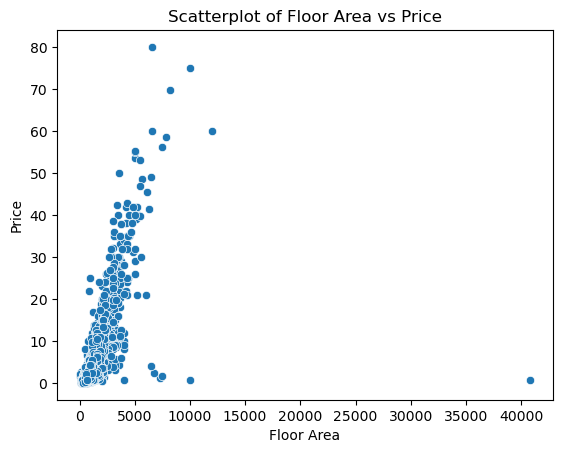

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example
sns.scatterplot(x=df['f_area'], y=df['price'])
plt.xlabel('Floor Area')
plt.ylabel('Price')
plt.title('Scatterplot of Floor Area vs Price')
plt.show()

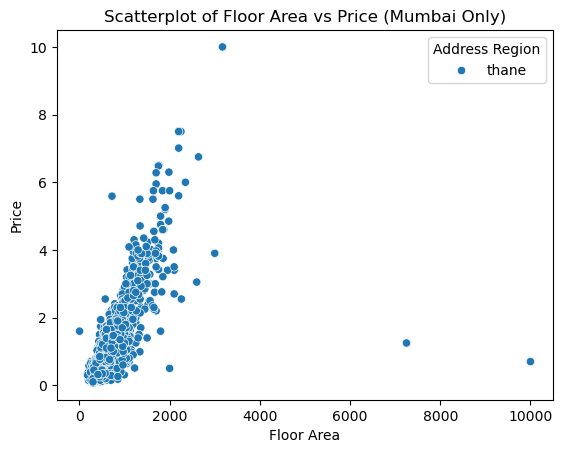

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for 'mumbai'
filtered_df = df[df['addressregion'] == 'thane']

# Scatter plot for 'mumbai' only
sns.scatterplot(x=filtered_df['f_area'], y=filtered_df['price'], hue=filtered_df['addressregion'])

# Add labels and title
plt.xlabel('Floor Area')
plt.ylabel('Price')
plt.title('Scatterplot of Floor Area vs Price (Mumbai Only)')
plt.legend(title='Address Region')
plt.show()


In [166]:
#After analyzing, found some errors in the area column; hence, dropped the rows with the below id's
df = df[~df['id'].isin([
    'cardid13695470', 'cardid72545677', 'cardid71119645',
    'cardid46503375', 'cardid48667071', 'cardid72200975',
    'cardid70294971', 'cardid70608749', 'cardid72754063',
    'cardid72078141', 'cardid71460761', 'cardid45089373',
    'cardid71419541', 'cardid72848693', 'cardid73238137'
])]

## property_type : New property, Resale, Rent, Other

`observation`
-  have this columns -> 'many_transaction type','leftmany_transaction type'
-  when 'many_Transaction type' values are present then its corresponding 'leftmany_Transaction type' values are not present and vice versa

In [167]:
df[['many_transaction type','leftmany_transaction type']].head()

,many_transaction type,leftmany_transaction type
0,new property,NaN
1,NaN,new property
2,new property,NaN
3,new property,NaN
4,new property,NaN


In [168]:
#combine_first Update null elements with value in the same location in other.
df['property_type'] = df["many_transaction type"].combine_first(df["leftmany_transaction type"])

In [169]:
df['property_type'].value_counts()

property_type
resale          6813
new property    5172
other              7
rent               1
Name: count, dtype: int64

In [170]:
df['property_type'].isna().sum()

3

In [171]:
df = df[~df['property_type'].isin(['other', 'rent'])]

In [172]:
# Drop columns : 'many_Transaction type','leftmany_Transaction type'
df = df.drop(['many_transaction type','leftmany_transaction type'],axis=1)

In [173]:
df.head(2)

,id,@type,@id,url,image,name,geo,potentialaction,wholeaddress,bhk_type,...,builder,project_name,furnish,price,addressregion,location_from_wholeaddress,bed,f_area,f_costpersqft,property_type
0,cardid69429251,apartment,https://www.magicbricks.com/propertydetails/2-bhk-635-sq-ft-multistorey-apartment-for-sale-pokhran-road-in-thane&id=4d423639343239323531,https://www.magicbricks.com/propertydetails/2-bhk-635-sq-ft-multistorey-apartment-for-sale-pokhran-road-in-thane&id=4d423639343239323531,https://img.staticmb.com/mbimages/project/photo_h310_w462/2023/04/14/project-photo-6-raymond-realty-ten-x-habitat-thane-5124557_1200_1600_310_462.jpg,"2 bhk flat for sale in tenx habitat raymond realty, pokhran road, thane","{'@type': 'geocoordinates', 'latitude': '19.20777713', 'longitude': '72.96747907'}","{'@type': 'buyaction', 'seller': {'@type': 'organization', 'name': 'raymond realty'}}","{'@type': 'postaladdress', 'addresslocality': 'pokhran road', 'addressregion': 'thane', 'addresscountry': 'in'}",2 bhk,...,raymond realty,tenx habitat raymond realty,unfurnished,1.80,thane,pokhran road,2.0,635.0,28346.0,new property
1,cardid69427147,apartment,https://www.magicbricks.com/propertydetails/3-bhk-1905-sq-ft-multistorey-apartment-for-sale-kharghar-in-navi-mumbai&id=4d423639343237313437,https://www.magicbricks.com/propertydetails/3-bhk-1905-sq-ft-multistorey-apartment-for-sale-kharghar-in-navi-mumbai&id=4d423639343237313437,https://img.staticmb.com/mbimages/project/photo_h310_w462/project-photo-28-sai-world-empire-navi-mumbai-5088768_600_800_310_462.jpg,"3 bhk flat for sale in paradise sai world empire, kharghar, navi mumbai","{'@type': 'geocoordinates', 'latitude': '19.08060457', 'longitude': '73.07393855'}","{'@type': 'buyaction', 'seller': {'@type': 'realestateagent', 'name': 'aristo real estate consultants'}}","{'@type': 'postaladdress', 'addresslocality': 'kharghar', 'addressregion': 'navi mumbai', 'addresscountry': 'in'}",3 bhk,...,paradise group,paradise sai world empire,unfurnished,2.37,navi mumbai,kharghar,3.0,1905.0,12441.0,new property


In [174]:
df.shape

(11988, 262)

## ownership

`observation`
-  columns:  'md_type of ownership', 'many_type of ownership' ,'leftmany_type of ownership'
-  the values which are present in the 'md_type of ownership' column at the corresponding place values present in the 'many_type of ownership' and 'leftmany_type of ownership' also hence drop both this 'many_type of ownership' ,'leftmany_type of ownership' columns

1. **Freehold**: The owner has complete ownership of the property and the land it stands on, with no time limit. They can sell, transfer, or modify it without restrictions.

2. **Co-operative Society**: Ownership is collective. Residents form a society, and members own shares in it, giving them the right to reside in a unit but not outright ownership of the property.

3. **Leasehold**: The property is leased for a specific period (e.g., 99 years). Ownership remains with the lessor, and the lessee pays rent or a lease fee.

4. **Power of Attorney (POA)**: A legal authorization that allows an individual to act on behalf of the property owner. It’s often used for property transactions but doesn't equate to ownership.

In [175]:
df['md_type of ownership'].value_counts()

md_type of ownership
freehold                5944
co-operative society    2040
leasehold                317
power of attorney         28
Name: count, dtype: int64

In [176]:
df = df.rename(columns={'md_type of ownership': 'ownership'})

In [177]:
# Drop columns : 'many_type of ownership' ,'leftmany_type of ownership'
df = df.drop(['many_type of ownership' ,'leftmany_type of ownership'],axis=1)

## status

`observation`
-  columns: 'many_status', 'leftmany_status'
-  when 'many_status' values are present then its corresponding 'leftmany_status' values are not present and vice versa

In [178]:
#combine_first Update null elements with value in the same location in other.
df['status'] = df['many_status'].combine_first(df['leftmany_status'])

In [179]:
df['status'].value_counts()

status
ready to move         7337
under construction     589
ongoing                  3
Name: count, dtype: int64

In [180]:
df['status'] = df['status'].str.lower()

In [181]:
df['status'].value_counts()

status
ready to move         7337
under construction     589
ongoing                  3
Name: count, dtype: int64

In [182]:
df.head(2)

,id,@type,@id,url,image,name,geo,potentialaction,wholeaddress,bhk_type,...,project_name,furnish,price,addressregion,location_from_wholeaddress,bed,f_area,f_costpersqft,property_type,status
0,cardid69429251,apartment,https://www.magicbricks.com/propertydetails/2-bhk-635-sq-ft-multistorey-apartment-for-sale-pokhran-road-in-thane&id=4d423639343239323531,https://www.magicbricks.com/propertydetails/2-bhk-635-sq-ft-multistorey-apartment-for-sale-pokhran-road-in-thane&id=4d423639343239323531,https://img.staticmb.com/mbimages/project/photo_h310_w462/2023/04/14/project-photo-6-raymond-realty-ten-x-habitat-thane-5124557_1200_1600_310_462.jpg,"2 bhk flat for sale in tenx habitat raymond realty, pokhran road, thane","{'@type': 'geocoordinates', 'latitude': '19.20777713', 'longitude': '72.96747907'}","{'@type': 'buyaction', 'seller': {'@type': 'organization', 'name': 'raymond realty'}}","{'@type': 'postaladdress', 'addresslocality': 'pokhran road', 'addressregion': 'thane', 'addresscountry': 'in'}",2 bhk,...,tenx habitat raymond realty,unfurnished,1.80,thane,pokhran road,2.0,635.0,28346.0,new property,under construction
1,cardid69427147,apartment,https://www.magicbricks.com/propertydetails/3-bhk-1905-sq-ft-multistorey-apartment-for-sale-kharghar-in-navi-mumbai&id=4d423639343237313437,https://www.magicbricks.com/propertydetails/3-bhk-1905-sq-ft-multistorey-apartment-for-sale-kharghar-in-navi-mumbai&id=4d423639343237313437,https://img.staticmb.com/mbimages/project/photo_h310_w462/project-photo-28-sai-world-empire-navi-mumbai-5088768_600_800_310_462.jpg,"3 bhk flat for sale in paradise sai world empire, kharghar, navi mumbai","{'@type': 'geocoordinates', 'latitude': '19.08060457', 'longitude': '73.07393855'}","{'@type': 'buyaction', 'seller': {'@type': 'realestateagent', 'name': 'aristo real estate consultants'}}","{'@type': 'postaladdress', 'addresslocality': 'kharghar', 'addressregion': 'navi mumbai', 'addresscountry': 'in'}",3 bhk,...,paradise sai world empire,unfurnished,2.37,navi mumbai,kharghar,3.0,1905.0,12441.0,new property,under construction


In [183]:
# Drop columns : 'many_Status', 'leftmany_Status'
df = df.drop(['many_status', 'leftmany_status'],axis=1)

## lift

`observation`
- columns: 'many_lifts','md_lift','leftmany_lifts','many_lift','leftmany_lift'
- combine and keep one value else nan

In [184]:
# Combine values
df['lift'] = [list(values) for values in zip(df['many_lifts'], df['md_lift'], df['leftmany_lifts'], df['many_lift'], df['leftmany_lift'])]

In [185]:
df['lift'] = df['lift'].apply(lambda row: next((val for val in row if not np.isnan(val)), None))

In [186]:
df['lift'].value_counts()

lift
2.0     2388
3.0     1333
4.0     1138
1.0      631
5.0      385
6.0      305
8.0       85
7.0       78
10.0      69
9.0       56
Name: count, dtype: int64

In [187]:
df['lift'].isna().sum()

5520

In [188]:
df['lift'].dtype

dtype('float64')

In [189]:
# Drop columns : 'many_lifts','md_lift','leftmany_lifts','many_lift','leftmany_lift'
df = df.drop(['many_lifts','md_lift','leftmany_lifts','many_lift','leftmany_lift'],axis=1)

In [190]:
df.shape

(11988, 255)

## floor

`observation`

- columns: 'aboutpjt_total floors', 'aboutpjt_total floors', 'md_floors allowed for construction','many_floor', 'leftmany_floor'
- from column 'md_floors allowed for construction','many_floor', 'leftmany_floor': get how many floor building has
- when 'many_floor' values are present then its corresponding 'leftmany_floor' values are not present and vice versa
- from 'many_floor', 'leftmany_floor': get flat is on which floor
- drop 'aboutpjt_total floors' column as it is wrong information

In [191]:
#combine_first Update null elements with value in the same location in other.
df['floor_work_1'] = df['many_floor'].combine_first(df['leftmany_floor'])

In [192]:
df['floor_work_1'] = df['floor_work_1'].astype('str') 

In [193]:
df['flat_on_floor'] = df['floor_work_1'].apply(
    lambda x: x.split('(')[0].strip() if '(' in str(x) else None
)


In [194]:
df['flat_on_floor'].isna().sum()

2307

In [195]:
df['total_floor'] = df['floor_work_1'].apply(
    lambda x: x.split('(')[1].strip() if '(' in str(x) else None
)

In [196]:
df['total_floor'].isna().sum()

2307

In [197]:
df['total_floor'] = df['total_floor'].str.extract(r'(\d+)').astype(float)

In [198]:
df['total_floor'].value_counts()

total_floor
7.0     1029
4.0      575
22.0     534
20.0     364
23.0     324
14.0     317
15.0     304
8.0      284
12.0     278
16.0     269
21.0     256
3.0      248
18.0     230
5.0      223
30.0     222
40.0     215
13.0     205
6.0      201
17.0     166
9.0      149
36.0     146
10.0     144
35.0     144
24.0     141
19.0     134
27.0     132
25.0     131
28.0     130
45.0     123
11.0     122
29.0     117
50.0     115
42.0      97
31.0      95
33.0      94
32.0      89
37.0      83
38.0      81
34.0      76
60.0      75
39.0      75
26.0      67
2.0       50
41.0      48
61.0      47
44.0      46
51.0      45
46.0      44
55.0      41
43.0      38
47.0      36
49.0      35
48.0      30
65.0      29
78.0      28
63.0      24
62.0      23
67.0      22
53.0      22
69.0      21
54.0      21
52.0      21
68.0      20
57.0      19
58.0      18
1.0       17
72.0      17
56.0      16
77.0      16
75.0      14
70.0      14
64.0      12
66.0      11
59.0       6
76.0       6
81.0       4


In [199]:
df['flat_on_floor'].value_counts()

flat_on_floor
3                 692
2                 688
1                 643
5                 641
4                 620
10                588
7                 564
6                 512
9                 390
12                369
8                 363
15                334
11                317
14                241
20                228
16                214
18                201
ground            201
13                176
21                144
17                144
19                131
22                125
25                121
23                 97
upper basement     82
30                 81
24                 76
27                 63
26                 58
28                 42
35                 38
40                 37
29                 35
33                 32
36                 31
32                 30
34                 30
50                 29
45                 26
lower basement     24
37                 21
38                 19
39                 18
41                

In [200]:
df['flat_on_floor'] = df['flat_on_floor'].replace({'lower basement': -1, 'upper basement': -2,'ground':0})

In [201]:
df['flat_on_floor'].value_counts()

flat_on_floor
3     692
2     688
1     643
5     641
4     620
10    588
7     564
6     512
9     390
12    369
8     363
15    334
11    317
14    241
20    228
16    214
18    201
0     201
13    176
21    144
17    144
19    131
22    125
25    121
23     97
-2     82
30     81
24     76
27     63
26     58
28     42
35     38
40     37
29     35
33     32
36     31
32     30
34     30
50     29
45     26
-1     24
37     21
38     19
39     18
41     17
42     17
31     17
44     13
47      9
48      8
60      8
46      7
43      7
52      7
62      6
68      6
55      6
57      5
56      4
51      4
70      3
66      3
49      3
58      3
54      3
53      3
61      2
73      1
75      1
71      1
65      1
Name: count, dtype: int64

In [202]:
df['total_floor'] = np.where(
    pd.isna(df['total_floor']) & pd.notna(df['md_floors allowed for construction']),
    df['md_floors allowed for construction'],
    df['total_floor']
)

In [203]:
df['total_floor'].isna().sum()

2074

In [204]:
# Drop columns : 'Aboutpjt_Total Floors','floor_work_1','many_Floor','leftmany_Floor'
df = df.drop(['aboutpjt_total floors','floor_work_1','many_floor','leftmany_floor','md_floors allowed for construction'],axis=1)

In [205]:
df['flat_on_floor'] =  df['flat_on_floor'].astype('float')

## construction 

`observation` 
- columns: 'md_age of construction', 'many_age of construction', 'leftmany_age of construction'
- when 'many_age of construction' values are present then its corresponding 'leftmany_age of construction' values are not present and vice versa

In [206]:
#combine_first Update null elements with value in the same location in other.
df['construction_1'] = df['many_age of construction'].combine_first(df['leftmany_age of construction'])

In [207]:
df['construction_1'].notna().sum()

3932

In [208]:
df[df['construction_1'] == df['md_age of construction']][['construction_1','md_age of construction']].shape

(3930, 2)

`observation`
- almost all values are same between construction_1 and md_age of construction columns hence drop construction_1,because md_age of construction have lesser nan values than construction_1 column 

In [209]:
df = df.rename(columns={'md_age of construction': 'construction'})

In [210]:
df['construction'].isna().sum()

1681

In [211]:
# Drop columns
df = df.drop(['construction_1','many_age of construction','leftmany_age of construction'],axis=1)

`observation`
- In the status column, the value "Under construction" is present, which we can copy to the corresponding place in the construction column. 

In [212]:
df['construction'] = df.apply(
    lambda row: 'under construction' if row['status'] == 'under construction' else row['construction'], axis=1
)

`observation`
- In the construction column, the value "under construction" is present, which we can copy to the corresponding place in the status column. 

In [213]:
df['status'] = df.apply(
    lambda row: 'under construction' if row['construction'] == 'under construction' else row['status'], axis=1
)

`observation`
- make case of values small in both construction and status column

In [214]:
df['construction'] = df['construction'].str.lower()

In [215]:
df['status'] = df['status'].str.lower()

<font color = yellow> as both status and construction column almost have similar values so chances of correlation

## balcony

`obseravation`
- columns: 'bb_balcony', 'leftbb_balcony', 'bb_balconies','leftbb_balconies'
- when one column values are present then its corresponding column values are not present

In [216]:
#combine_first Update null elements with value in the same location in other.
df['balcony'] = (
    df['bb_balcony']
    .combine_first(df['leftbb_balcony'])
    .combine_first(df['bb_balconies'])
    .combine_first(df['leftbb_balconies'])
)


In [217]:
# Drop columns
df = df.drop(['bb_balcony', 'leftbb_balcony', 'bb_balconies','leftbb_balconies'],axis=1)

## extra_rooms

`observation` 

- columns: 'md_additional rooms', 'leftmany_additional rooms', 'many_additional rooms'
- when 'leftmany_Additional Rooms' values are present then its corresponding 'many_Additional Rooms' values are not present and vice versa

In [218]:
#combine_first Update null elements with value in the same location in other.
df['balcony1'] = df['leftmany_additional rooms'].combine_first(df['many_additional rooms'])

In [219]:
df['balcony1'].isna().sum()

9128

In [220]:
df['extra_room'] = df['balcony1'].str.split(' ').str[1].str.strip()

In [221]:
df['extra_room'].value_counts()

extra_room
store      2058
study       442
servant     360
Name: count, dtype: int64

In [222]:
df['extra_room'].notna().sum()

2860

In [223]:
df['extra_room'].isna().sum()

9128

In [224]:
df['md_additional rooms'].value_counts()

md_additional rooms
none of these                             3012
store                                     1111
puja room                                  744
study                                      309
servant room                               297
puja room, store                           226
puja room, study, store, servant room      225
puja room, study, store                    115
store, servant room                         85
puja room, store, study, servant room       79
puja room, study                            76
study, store                                71
puja room, servant room                     63
puja room, store, servant room              55
puja room, study, servant room              31
study, store, servant room                  24
study, servant room                         24
store, study                                19
puja room, store, study                     16
store, puja room                             4
puja room, study, servant room, store   

In [225]:
result = df['extra_room'].apply(
    lambda x: any(str(x) in str(room) for room in df['md_additional rooms']) if pd.notnull(x) else False
)

In [226]:
result.value_counts() 

extra_room
False    9128
True     2860
Name: count, dtype: int64

`observation`
- balcony1 column values present in the 'md_additional rooms' hence drop this balcony1 and extra_room column also and hkeep only 'md_additional rooms' column

In [227]:
#sort value alphabetically 
df['md_additional rooms'] = df['md_additional rooms'].apply(
    lambda x: ', '.join(sorted(x.split(', '))) if pd.notna(x) else None
)

In [228]:
#remove none of these eg:from these 'none of these, store' and keep only store 
#but if we have only 'none of these' then we keep that as it is 
#also remove room word from all values 

df['md_additional rooms'] = df['md_additional rooms'].apply(
    lambda x: x if pd.isna(x) or str(x).strip() == 'none of these' else ', '.join(
        [item.replace(' room', '') for item in str(x).split(', ') if item != 'none of these']
    )
)



In [229]:
df['md_additional rooms'].value_counts()

md_additional rooms
none of these                  3012
store                          1114
puja                            744
puja, servant, store, study     316
study                           309
servant                         297
puja, store                     230
puja, store, study              132
store, study                     90
servant, store                   86
puja, study                      77
puja, servant                    63
puja, servant, store             56
puja, servant, study             32
servant, store, study            29
servant, study                   24
Name: count, dtype: int64

In [230]:
# Drop columns
df = df.drop(['leftmany_additional rooms','balcony1','many_additional rooms','extra_room'],axis=1)

In [231]:
df = df.rename(columns={'md_additional rooms': 'extra_rooms'})

## Facing

`observation` 
- columns:  leftmany_facing, many_facing
- when 'leftmany_facing' values are present then its corresponding 'many_facing' values are not present and vice versa

In [232]:
#combine_first Update null elements with value in the same location in other.
df['facing'] = df['leftmany_facing'].combine_first(df['many_facing'])

In [233]:
# Drop columns
df = df.drop(['leftmany_facing','many_facing'],axis=1)

## towers and available_units

`observation`
- columns: 'ap_tower & unit','aboutpjt_total units','aboutpjt_total towers','ap_tower','ap_unit'
- eg : 10 Towers,1512 Units : A residential project might have 10 towers, each with 151 apartments, totaling 10 × 151 = 1512 units.
- all the values which are present in 'ap_unit' are available in "aboutpjt_total units" column hence drop this 'ap_unit' column
- all the values which are present in 'ap_tower' are available in "aboutpjt_total towers" column hence drop this 'ap_tower' column
- all the values which are present in 'ap_tower & unit' are available in 'aboutpjt_total units','aboutpjt_total towers' column hence drop this 'ap_tower & unit' column
- rename 'aboutpjt_total units' as 'available_units'
- rename 'aboutpjt_total towers' 'towers'

In [234]:
# Drop columns
df = df.drop(['ap_unit','ap_tower','ap_tower & unit'],axis=1)

In [235]:
df = df.rename(columns={'aboutpjt_total units': 'available_units', 
                        'aboutpjt_total towers': 'towers'})

## longitude and lattitude 

`observation`
- separate longitude and latitude from geo column  

In [236]:
df['lattitude'] = df['geo'].str.split(',').str[1].str.split(':').str[1].str.strip(" '\"").astype('float')

In [237]:
df['longitude'] = df['geo'].str.split(',').str[2].str.split(':').str[1].str.strip(" '\"}").astype('float')

In [238]:
df['longitude'].isna().sum()

470

**Valid values for lat and long**     
India lies to the north of the equator between **6° 44'** and **35° 30'** north latitude and **68° 7'** and **97° 25'** east longitude.  
lattitude rage - **6° 44'** and **35° 30'**  
logitude range - **68° 7'** and **97° 25'**

In [239]:
df[['lattitude','longitude']].describe()

,lattitude,longitude
count,11518.000000,11518.000000
mean,19.144441,72.905933
std,0.189246,0.087992
min,9.209138,72.704548
25%,19.062055,72.839809
50%,19.143882,72.872695
75%,19.210299,72.964031
max,19.832738,74.021019


`observation`
- The range of latitude and longitude based on the minimum and maximum values is appropriate.

In [240]:
# Drop columns
df = df.drop(['geo'],axis=1)

## seller

`observation`
- make seller column from potentialAction column, which have this values [organization,person,realestateagent]

In [241]:
df['seller'] = df['potentialaction'].str.split(',').str[1].str.split(':').str[2].str.strip(" '\"")

In [242]:
df['seller'].value_counts()

seller
realestateagent    8117
person             3507
organization        364
Name: count, dtype: int64

In [243]:
# Drop columns
df = df.drop(['potentialaction'],axis=1)

## amenities

In [244]:
df['addressregion'].value_counts()

addressregion
mumbai         7785
thane          2049
navi mumbai    1619
palghar         535
Name: count, dtype: int64

In [245]:
# Define price bins and labels
price_bins = [0, 0.99, 1.99, 2.99, 3.99, 4.99, 5.99, 6.99, 7.99, 8.99, 9.99, 14.99, 20.00, float('inf')]
price_labels = [
    "0.00 - 0.99", "1.00 - 1.99", "2.00 - 2.99", "3.00 - 3.99", "4.00 - 4.99", 
    "5.00 - 5.99", "6.00 - 6.99", "7.00 - 7.99", "8.00 - 8.99", "9.00 - 9.99", 
    "10.00 - 14.99", "15.00 - 20.00", "20.00 and above"
]

# Use pd.cut to categorize the prices
df['price_category'] = pd.cut(df['price'], bins=price_bins, labels=price_labels, right=True)

# Count the occurrences in each category
category_counts = df['price_category'].value_counts().sort_index()

# Print the result
print(category_counts)

price_category
0.00 - 0.99        3257
1.00 - 1.99        3467
2.00 - 2.99        1999
3.00 - 3.99        1075
4.00 - 4.99         571
5.00 - 5.99         415
6.00 - 6.99         295
7.00 - 7.99         189
8.00 - 8.99         140
9.00 - 9.99         102
10.00 - 14.99       242
15.00 - 20.00       109
20.00 and above     127
Name: count, dtype: int64


In [246]:
# Create a pivot table to show the average price for each combination of construction category and address region
pivot_table = df.pivot_table(values='price', index='price_category', columns='addressregion', aggfunc='count')

# Display the pivot table
print(pivot_table)

addressregion    mumbai  navi mumbai  palghar  thane
price_category                                      
0.00 - 0.99         877          877      525    978
1.00 - 1.99        2244          457        9    757
2.00 - 2.99        1631          172        0    196
3.00 - 3.99         935           67        1     72
4.00 - 4.99         524           24        0     23
5.00 - 5.99         390           13        0     12
6.00 - 6.99         284            5        0      6
7.00 - 7.99         184            1        0      4
8.00 - 8.99         138            2        0      0
9.00 - 9.99         101            1        0      0
10.00 - 14.99       241            0        0      1
15.00 - 20.00       109            0        0      0
20.00 and above     127            0        0      0


C:\Users\ABC\AppData\Local\Temp\ipykernel_1308\2395151249.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values='price', index='price_category', columns='addressregion', aggfunc='count')


`observation`
- High-price properties missing in Navi Mumbai, Thane, and Palghar → No properties above ₹6 Cr in these regions.    
- Palghar lacks high-price properties → No properties beyond ₹1 Cr in Palghar.    
- Feature engineering per region → Need to handle each feature differently based on addressregion.    
- Price variation by region → To avoid bias, process data considering both addressregion and price.    
- Combine 'am' columns → Group all columns with 'am' into a single list for efficient handling.    

In [247]:
columns_with_am = [col for col in df.columns if col.startswith('am')]

In [248]:
columns_with_am

['am_12204',
 'am_12226',
 'am_12225',
 'am_12229',
 'am_12230',
 'am_1404107',
 'am_12201',
 'am_12205',
 'am_12202',
 'am_12209',
 'am_12207',
 'am_12208',
 'am_12214',
 'am_12216',
 'am_12218',
 'am_1404110',
 'am_12224',
 'am_12206',
 'am_1404117',
 'am_1404105',
 'am_12220',
 'am_12228',
 'am_12203',
 'am_12211',
 'am_1404118',
 'am_1404106',
 'am_1404125',
 'am_1404124',
 'am_12538',
 'am_12540',
 'am_12219',
 'am_12227',
 'am_12523',
 'am_12533',
 'am_12534',
 'am_12535',
 'am_12536',
 'am_12537',
 'am_12539',
 'am_12543',
 'am_12545',
 'am_12581',
 'am_12583',
 'am_1404155',
 'am_1404114',
 'am_1404143',
 'am_1404109',
 'am_1404131',
 'am_12212',
 'am_1404112',
 'am_12217',
 'am_1404116',
 'am_1404120',
 'am_1404111',
 'am_12222',
 'am_1404115',
 'am_1404123',
 'am_1404127',
 'am_1404128',
 'am_1404129',
 'am_12223',
 'am_12215',
 'am_1404108',
 'am_12213',
 'am_12221',
 'am_1404130',
 'am_1404126',
 'am_1404113',
 'am_1404122',
 'am_12586',
 'am_1404156',
 'am_12525',
 'am_125

### method 1 :kmeans 

note : this method we can apply after train test split

I have perform this method in mg_model_building ipynb notebook already

### method 2 : assign weightage

note : this method we can apply before train test split but in feature engineering 

I have perforrm this method in mg_feature_engineering.ipynb notebook already

### method 3: actual weightage

note : this method we can apply after train test split

I have perform this method in mg_model_building ipynb notebook already

note : use this method only after this structure   
so before using below code make sure that this steps are compulsory you have to do then use below code 

1. Handle Missing Values (e.g., SimpleImputer, KNNImputer, or domain-specific methods)
2. Apply Train-CV-Test Split then Compute Weightage for extra_rooms (using the training set) then Use Weightage in CV and Test Sets (for this code is below)
3. Proceed with Model Training & Evaluation

I've structured the code like this  
1. **Train-test split per `addressregion`**.
2. **Group the train data by `addressregion`**.
3. **Calculate weightages per region based on the training data**.
4. **Apply these weightages to both the train and test sets**.

`observation`  
- Performed 3 different methods to convert the amenities column into numerical form:
  - Method 1 : Kmeans 
  - Method 2 : Assign weightage  
  - Method 3 : Actual weightage  
- Evaluate which method gives the best model performance and keep that as the final approach.

In [249]:
# # Drop columns
# df = df.drop(['am_12204',
#  'am_12226',
#  'am_12225',
#  'am_12229',
#  'am_12230',
#  'am_1404107',
#  'am_12201',
#  'am_12205',
#  'am_12202',
#  'am_12209',
#  'am_12207',
#  'am_12208',
#  'am_12214',
#  'am_12216',
#  'am_12218',
#  'am_1404110',
#  'am_12224',
#  'am_12206',
#  'am_1404117',
#  'am_1404105',
#  'am_12220',
#  'am_12228',
#  'am_12203',
#  'am_12211',
#  'am_1404118',
#  'am_1404106',
#  'am_1404125',
#  'am_1404124',
#  'am_12538',
#  'am_12540',
#  'am_12219',
#  'am_12227',
#  'am_12523',
#  'am_12533',
#  'am_12534',
#  'am_12535',
#  'am_12536',
#  'am_12537',
#  'am_12539',
#  'am_12543',
#  'am_12545',
#  'am_12581',
#  'am_12583',
#  'am_1404155',
#  'am_1404114',
#  'am_1404143',
#  'am_1404109',
#  'am_1404131',
#  'am_12212',
#  'am_1404112',
#  'am_12217',
#  'am_1404116',
#  'am_1404120',
#  'am_1404111',
#  'am_12222',
#  'am_1404115',
#  'am_1404123',
#  'am_1404127',
#  'am_1404128',
#  'am_1404129',
#  'am_12223',
#  'am_12215',
#  'am_1404108',
#  'am_12213',
#  'am_12221',
#  'am_1404130',
#  'am_1404126',
#  'am_1404113',
#  'am_1404122',
#  'am_12586',
#  'am_1404156',
#  'am_12525',
#  'am_12547',
#  'am_12577',
#  'am_1404150',
#  'am_1404148',
#  'am_1404146',
#  'am_12529',
#  'am_12521',
#  'am_12522',
#  'am_12526',
#  'am_12530',
#  'am_12532',
#  'am_12528',
#  'am_12546',
#  'am_1404161',
#  'am_12234',
#  'am_12585',
#  'am_1404149',
#  'am_1404152',
#  'am_1404158',
#  'am_1404157',
#  'am_1404154',
#  'am_12511',
#  'am_12579',
#  'am_12527',
#  'am_12524',
#  'am_12541',
#  'am_12238',
#  'am_12562',
#  'am_12578',
#  'am_12548',
#  'am_12549',
#  'am_12239',
#  'am_1404151',
#  'am_12236',
#  'am_12237',
#  'am_12556',
#  'am_12560',
#  'am_12555',
#  'am_12561',
#  'am_1404147',
#  'am_12235',
#  'am_12557',
#  'am_12233',
#  'am_12531',
#  'am_12518',
#  'am_12232',
#  'am_12544',
#  'am_12551',
#  'am_12554',
#  'am_12542',
#  'am_12520',
#  'am_12558',
#  'am_12584',
#  'am_1404160',
#  'am_1404159',
#  'am_12516',
#  'am_12580',
#  'am_12513',
#  'am_12550',
#  'am_12552',
#  'am_12553'],axis=1)

In [250]:
df.shape

(11988, 244)

`other columns`

`observation`
- combine 'educational institute' - 'educational institute_1','educational institute_2','educational institute_3','educational institute_4','educational institute_5'
- combine 'transportation hub' - 'transportation hub_1','transportation hub_2','transportation hub_3','transportation hub_4','transportation hub_5'
- combine 'shopping centre' - 'shopping centre_1','shopping centre_2','shopping centre_3','shopping centre_4','shopping centre_5'
- combine 'commercial hub_1','commercial hub_2','commercial hub_3','commercial hub_4','commercial hub_5'
- combine 'hospital_1','hospital_2','hospital_3','hospital_4','hospital_5'
- combine 'tourist spot_1','tourist spot_2','tourist spot_3','tourist spot_4'

In [251]:
# Combine values
df['education'] = [list(values) for values in zip(df['educational institute_1'], df['educational institute_2'], df['educational institute_3'], df['educational institute_4'], df['educational institute_5'])]
df['education'] = df['education'].apply(lambda x: ', '.join(filter(pd.notna, x)))

In [252]:
# Combine values
df['transport'] = [list(values) for values in zip(df['transportation hub_1'], df['transportation hub_2'], df['transportation hub_3'], df['transportation hub_4'], df['transportation hub_5'])]
df['transport'] = df['transport'].apply(lambda x: ', '.join(filter(pd.notna, x)))

In [253]:
# Combine values
df['shopping_centre'] = [list(values) for values in zip(df['shopping centre_1'], df['shopping centre_2'], df['shopping centre_3'], df['shopping centre_4'], df['shopping centre_5'])]
df['shopping_centre'] = df['shopping_centre'].apply(lambda x: ', '.join(filter(pd.notna, x)))

In [254]:
# Combine values
df['commercial_hub'] = [list(values) for values in zip(df['commercial hub_1'], df['commercial hub_2'], df['commercial hub_3'], df['commercial hub_4'], df['commercial hub_5'])]
df['commercial_hub'] = df['commercial_hub'].apply(lambda x: ', '.join(filter(pd.notna, x)))

In [255]:
# Combine values
df['hospital'] = [list(values) for values in zip(df['hospital_1'], df['hospital_2'], df['hospital_3'], df['hospital_4'], df['hospital_5'])]
df['hospital'] = df['hospital'].apply(lambda x: ', '.join(filter(pd.notna, x)))

In [256]:
# Combine values
df['tourist'] = [list(values) for values in zip(df['tourist spot_1'], df['tourist spot_2'], df['tourist spot_3'], df['tourist spot_4'])]
df['tourist'] = df['tourist'].apply(lambda x: ', '.join(filter(pd.notna, x)))

In [257]:
# Drop columns
df = df.drop(['educational institute_1','educational institute_2','educational institute_3','educational institute_4','educational institute_5',
             'transportation hub_1','transportation hub_2','transportation hub_3','transportation hub_4','transportation hub_5',
             'shopping centre_1','shopping centre_2','shopping centre_3','shopping centre_4','shopping centre_5',
             'commercial hub_1','commercial hub_2','commercial hub_3','commercial hub_4','commercial hub_5',
             'hospital_1','hospital_2','hospital_3','hospital_4','hospital_5',
             'tourist spot_1','tourist spot_2','tourist spot_3','tourist spot_4'],axis=1)

In [258]:
df.shape

(11988, 221)

In [259]:
df = df.drop(['@id','@type','bhk_type' ,'locality_url','md_booking amount','md_loan offered','md_water availability','ap_price','ap_price per sqft','ap_configuration','ap_pjt_url','ap_ratings','ap_reviews_by','headings_with_ratings','aboutpjt_bhk','2 bhk flat','locality_url_review','liv_environment','liv_commuting','liv_places of interest','md_status of electricity','3 bhk flat','1 bhk flat','studio apartment','4 bhk flat','5 bhk flat','md_landmarks', 'multistorey apartment', '3 bhk villa', '4 bhk villa', 'residential plot', '2 bhk builder', '3 bhk builder','4 bhk penthouse','5 bhk penthouse', 'md_authority approval','6 bhk flat','rent','commercial office space','3 bhk penthouse','md_rera id','aboutpjt_launch date'],axis=1)

In [260]:
df.shape

(11988, 179)

## Overlooking

`observation`
-  md_overlooking : rename

In [261]:
df['md_overlooking'].value_counts()

md_overlooking
main road                       2266
garden/park, main road          1739
garden/park                     1540
garden/park, pool, main road    1423
garden/park, pool                393
pool, garden/park, main road     254
pool                             102
pool, main road                   60
main road, garden/park            59
pool, garden/park                 58
main road, garden/park, pool      55
garden/park, main road, pool       9
pool, main road, garden/park       7
main road, not available           2
main road, pool, garden/park       1
Name: count, dtype: int64

In [262]:
df['md_overlooking'] = df['md_overlooking'].apply(
    lambda x: ', '.join(sorted(x.split(', '))) if pd.notna(x) else None
)

In [263]:
# Remove the phrase 'not available' from the 'overlooking' column
df['md_overlooking'] = df['md_overlooking'].str.replace(',? *not available', '', regex=True)

In [264]:
df = df.rename(columns={'md_overlooking': 'overlooking'})

## room_type

`observation`
-make categories like flat and apartment from 'name' column 

In [265]:
df['room_type'] = df['name'].apply(lambda x: 'flat' if 'flat' in x else ('apartment' if 'apartment' in x else 'other'))

In [266]:
df['room_type'].value_counts()

room_type
flat         11879
apartment      109
Name: count, dtype: int64

In [267]:
(df['room_type'].value_counts()) / len(df['room_type']) *100

room_type
flat         99.090757
apartment     0.909243
Name: count, dtype: float64

`observation`  
- Flats make up the majority (99%), while apartments account for only 1%. Therefore, we should drop the apartment rows. Since the entire column will then contain only flats, it is no longer needed and can also be dropped.  
- There are no missing values.

In [268]:
#drop apartment rows
df = df[df['room_type'] != 'apartment']

In [269]:
df['room_type'].value_counts()

room_type
flat    11879
Name: count, dtype: int64

In [270]:
df = df.drop(['room_type'],axis=1)

In [271]:
df.shape

(11879, 179)

## EMI

`observation`
- convert all emi values in lakh
- some values in 3 digit only means 700 rs so convert them also into thousand
- some values in lakh so convert then also into thousand 

In [272]:
df['emi'].head()

0      81k
1    1.07l
2      81k
3      74k
4      57k
Name: emi, dtype: object

In [273]:
df['emi'].dtype

dtype('O')

In [274]:
converted_emi = []

for emi_n in df['emi']:
    if isinstance(emi_n, str):  # Check if emi_n is a string
        if 'k' in emi_n:
            # Convert from thousands to lakhs
            converted_emi.append(float(emi_n.replace('k', '')) / 100)
        elif 'l' in emi_n:
            # No change needed for lakhs
            converted_emi.append(float(emi_n.replace('l', '')))
        else:
            # Convert rupees to lakhs
            converted_emi.append(float(emi_n) / 100000)
    else:
        # If it's already a float, convert rupees to lakhs
        converted_emi.append(emi_n / 100000)

# Add the converted values to the DataFrame
df['converted_emi'] = converted_emi


In [275]:
df = df.drop(['emi'],axis=1)

## project_in_acres

`observation`
- aboutpjt_project size : convert all in sqft

In [276]:
df['aboutpjt_project size'].isna().sum()

5741

In [277]:
df['aboutpjt_project size'].str.split(' ').str[1].value_counts()

aboutpjt_project size
acre       5514
sq-m        446
sq-ft       174
hectare       3
sq-yrd        1
Name: count, dtype: int64

In [278]:
# Conversion function for different units to acres
def convert_to_acres(value):
    if isinstance(value, str):  # Check if the value is a string
        if 'acre' in value:
            acres = float(value.replace('acre', '').strip())
            return round(acres, 4)  
        elif 'sq-m' in value:
            sqm = float(value.replace('sq-m', '').strip())
            return round(sqm * 0.000247105, 4)  
        elif 'sq-ft' in value:
            sqft = float(value.replace('sq-ft', '').strip())
            return round(sqft * 0.0000229568, 4)  
        elif 'hectare' in value:
            hectares = float(value.replace('hectare', '').strip())
            return round(hectares * 2.47105, 4)  
        elif 'sq-yrd' in value:
            sq_yrd = float(value.replace('sq-yrd', '').strip())
            return round(sq_yrd * 0.000836127, 4)  
    elif isinstance(value, (int, float)):  # If value is numeric
        return round(value * 0.0000229568, 4)  
    return np.nan

# Apply the conversion to the column
df['project_in_acres'] = df['aboutpjt_project size'].apply(lambda x: convert_to_acres(x))


In [279]:
df = df.drop(['aboutpjt_project size'],axis=1)

In [280]:
df.isnull().sum()

id                                0
url                               0
image                           887
name                              0
wholeaddress                      0
address                           0
md_flooring                    4442
image_urls                     4242
available_units                5209
towers                         5017
am_12204                       7763
am_12226                       9975
am_12225                      10886
am_12229                       8764
am_12230                      10275
am_1404107                    11320
am_12201                       7528
am_12205                       6922
am_12202                       6775
am_12209                       6897
am_12207                       8495
am_12208                       7727
am_12214                      10157
am_12216                       8919
am_12218                       9363
am_1404110                    10815
am_12224                       9523
am_12206                    

In [281]:
df.shape

(11879, 179)

In [282]:
#rename columns 
'md_flooring,f_area,f_costpersqft,converted_emi'
df = df.rename(columns={'md_flooring':'flooring','f_area':'area','f_costpersqft':'costpersqft','converted_emi':'emi','locality_url_rating':'locality_rating'})

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11879 entries, 0 to 12021
Columns: 179 entries, id to project_in_acres
dtypes: category(1), float64(17), object(161)
memory usage: 16.2+ MB


In [284]:
#missing value in percentage
missing_values_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values in each column:")
print(missing_values_percentage)


Percentage of missing values in each column:
id                             0.000000
url                            0.000000
image                          7.466958
name                           0.000000
wholeaddress                   0.000000
address                        0.000000
flooring                      37.393720
image_urls                    35.710077
available_units               43.850492
towers                        42.234195
am_12204                      65.350619
am_12226                      83.971715
am_12225                      91.640710
am_12229                      73.777254
am_12230                      86.497180
am_1404107                    95.294217
am_12201                      63.372338
am_12205                      58.270898
am_12202                      57.033420
am_12209                      58.060443
am_12207                      71.512754
am_12208                      65.047563
am_12214                      85.503830
am_12216                      75.0

## flooring 

`observation` 
- 37% missing values 
- still I make feature engineering on that and I have make that using two different approach  
  - 1st Approach : Kmeans clustering 
    - using MultiLabelBinarizer create binary features
    - apply kmeans and find cluster
  - 2nd Approach : avg weightage for each flooring
    - assign weightage to each flooring according to the cost and quality of the material
    - cal sum of weightage for each data points 

In [285]:
df['flooring'].dtype

dtype('O')

In [286]:
df['flooring'].value_counts()

flooring
vitrified                                                                                         3671
marble                                                                                             691
ceramic tiles                                                                                      329
vitrified, wooden                                                                                  168
granite, vitrified                                                                                 134
marble, vitrified                                                                                  129
ceramic tiles, vitrified                                                                           113
vitrified, marble, granite                                                                          94
vitrified, ceramic tiles                                                                            94
ceramic tiles, granite, vitrified                               

In [287]:
df['flooring'].isnull().sum()

4442

In [288]:
df['flooring'] = df['flooring'].fillna('unknown')

### method 1 : Kmeans clustering 

note : this method we can apply after train test split

I have perform this method in mg_model_building ipynb notebook already

### method 2 : assign weightage 

note : this method we can apply before train test split but in feature engineering 

I have perforrm this method in mg_feature_engineering.ipynb notebook already

In [289]:
df.columns

Index(['id', 'url', 'image', 'name', 'wholeaddress', 'address', 'flooring',
       'image_urls', 'available_units', 'towers',
       ...
       'seller', 'price_category', 'education', 'transport', 'shopping_centre',
       'commercial_hub', 'hospital', 'tourist', 'emi', 'project_in_acres'],
      dtype='object', length=179)

In [291]:
df.to_csv('mg_cleaned_dataset.csv',index=False)

In [292]:
df.to_excel('excel_cleaned_dataset.xlsx',index=False)